# Exploratory Data Analysis 

We will join main application_train with other datasets

In [3]:
from IPython.display import Image

In [5]:
% cd ~

/home/minhvu0899


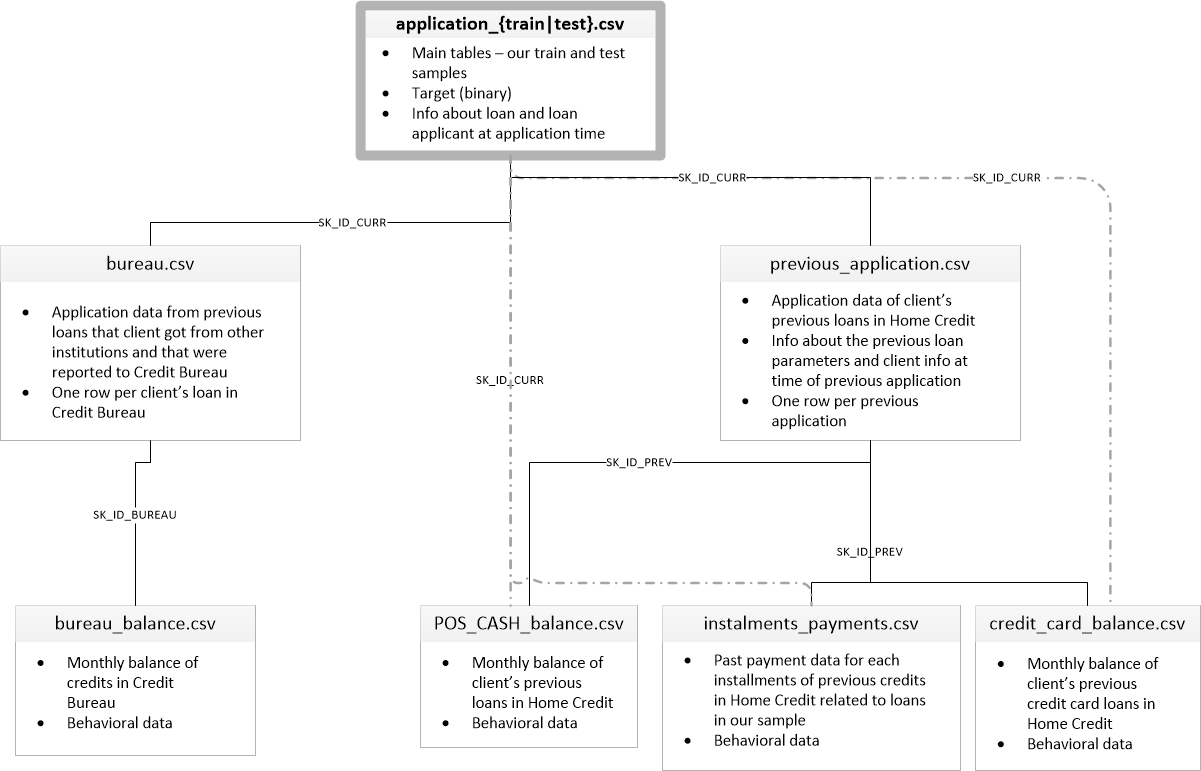

In [6]:
Image(filename='Pictures/data_map_home_credit.png') 

* **application_{train|test}.csv**

    - This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
    - Static data for all applications. One row represents one loan in our data sample.


* **bureau.csv**

    - All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
    - For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.


* **bureau_balance.csv**

    - Monthly balances of previous credits in Credit Bureau.
    - This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.


* **POS_CASH_balance.csv**

    - Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
    - This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.


* **credit_card_balance.csv**

    - Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
    - This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.


* **previous_application.csv**

    - All previous applications for Home Credit loans of clients who have loans in our sample.
    - There is one row for each previous application related to loans in our data sample.


* **installments_payments.csv**

    - Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
    - There is a) one row for every payment that was made plus b) one row each for missed payment.
    - One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.


* **HomeCredit_columns_description.csv**

    - This file contains descriptions for the columns in the various data files.

# Predict how capable each applicant is of replaying a loan

Columns description: https://docs.google.com/spreadsheets/d/1Ano-dLFAqBLJk2MCrVlClpj3QnOMZGBtQDbqeg12XKU/edit?usp=sharing

Some important varibales: https://docs.google.com/spreadsheets/d/195u9E27V5u3yegTFHIAG0YeMPytgPSqvC8gICF-soHg/edit?usp=sharing

In [7]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Training data
train_dataset = pd.read_csv('Dataset/Home Credit Default Rate/application_train_after_visualization_and_outlier_process.csv')

print('Train data shape: ', train_dataset.shape)

train_dataset.head()

Train data shape:  (306914, 123)


,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL_THOUSAND_DOLLAR,AMT_CREDIT_THOUSAND_DOLLAR,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,100002,1,0,M,N,Y,0,202.5,406.5975,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,100003,0,0,F,N,N,0,270.0,1293.5025,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,100004,0,1,M,Y,Y,0,67.5,135.0000,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,100006,0,0,F,N,Y,0,135.0,312.6825,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,100007,0,0,M,N,Y,0,121.5,513.0000,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
train_dataset = train_dataset.drop(columns=['Unnamed: 0'])
print('Train data shape: ', train_dataset.shape)

Train data shape:  (306914, 122)


# Visualization (con't)

I missed two very important features in my Visualization Notebook: **AMT_ANNUITY** and **AMT_GOODS_PRICE**. So here in this notebook, I will add a couple of plots

* **AMT_ANNUITY**: Monthly repayment
* **AMT_GOODS_PRICE**:  For consumer loans it is the price of the goods for which the loan is given

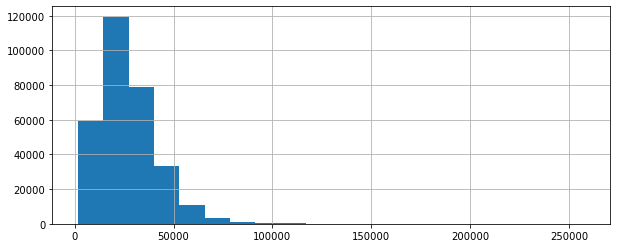

In [10]:
train_dataset['AMT_ANNUITY'].hist(bins=20, figsize=(10,4))
plt.show()

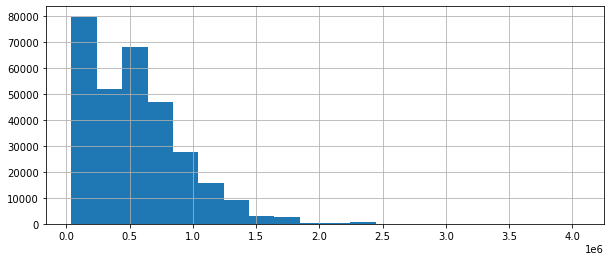

In [11]:
train_dataset['AMT_GOODS_PRICE'].hist(bins=20, figsize=(10,4))
plt.show()

In [13]:
train_dataset['AMT_ANNUITY'] = train_dataset['AMT_ANNUITY']/1000
train_dataset['AMT_GOODS_PRICE'] = train_dataset['AMT_GOODS_PRICE']/1000

train_dataset = train_dataset.rename(columns={'AMT_ANNUITY': 'AMT_ANNUITY_THOUSAND_DOLLAR', 
                                              'AMT_GOODS_PRICE': 'AMT_GOODS_PRICE_THOUSAND_DOLLAR'})

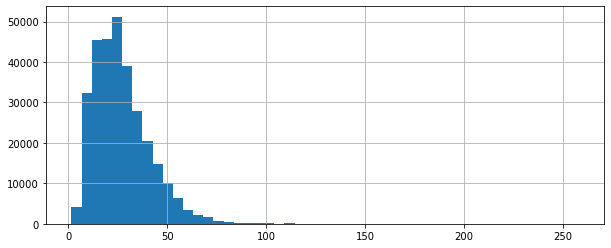

In [18]:
train_dataset['AMT_ANNUITY_THOUSAND_DOLLAR'].hist(bins=50, figsize=(10,4))
plt.show()

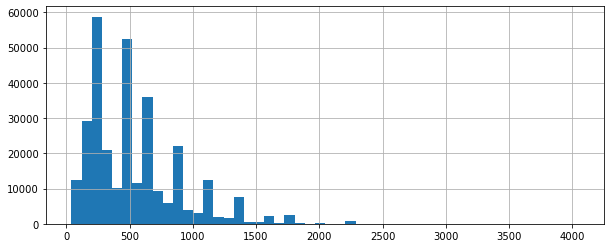

In [17]:
train_dataset['AMT_GOODS_PRICE_THOUSAND_DOLLAR'].hist(bins=50, figsize=(10,4))
plt.show()

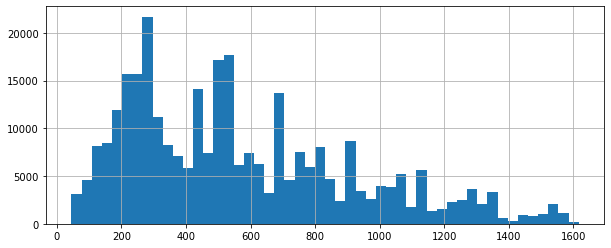

In [20]:
train_dataset['AMT_CREDIT_THOUSAND_DOLLAR'].hist(bins=50, figsize=(10,4))
plt.show()

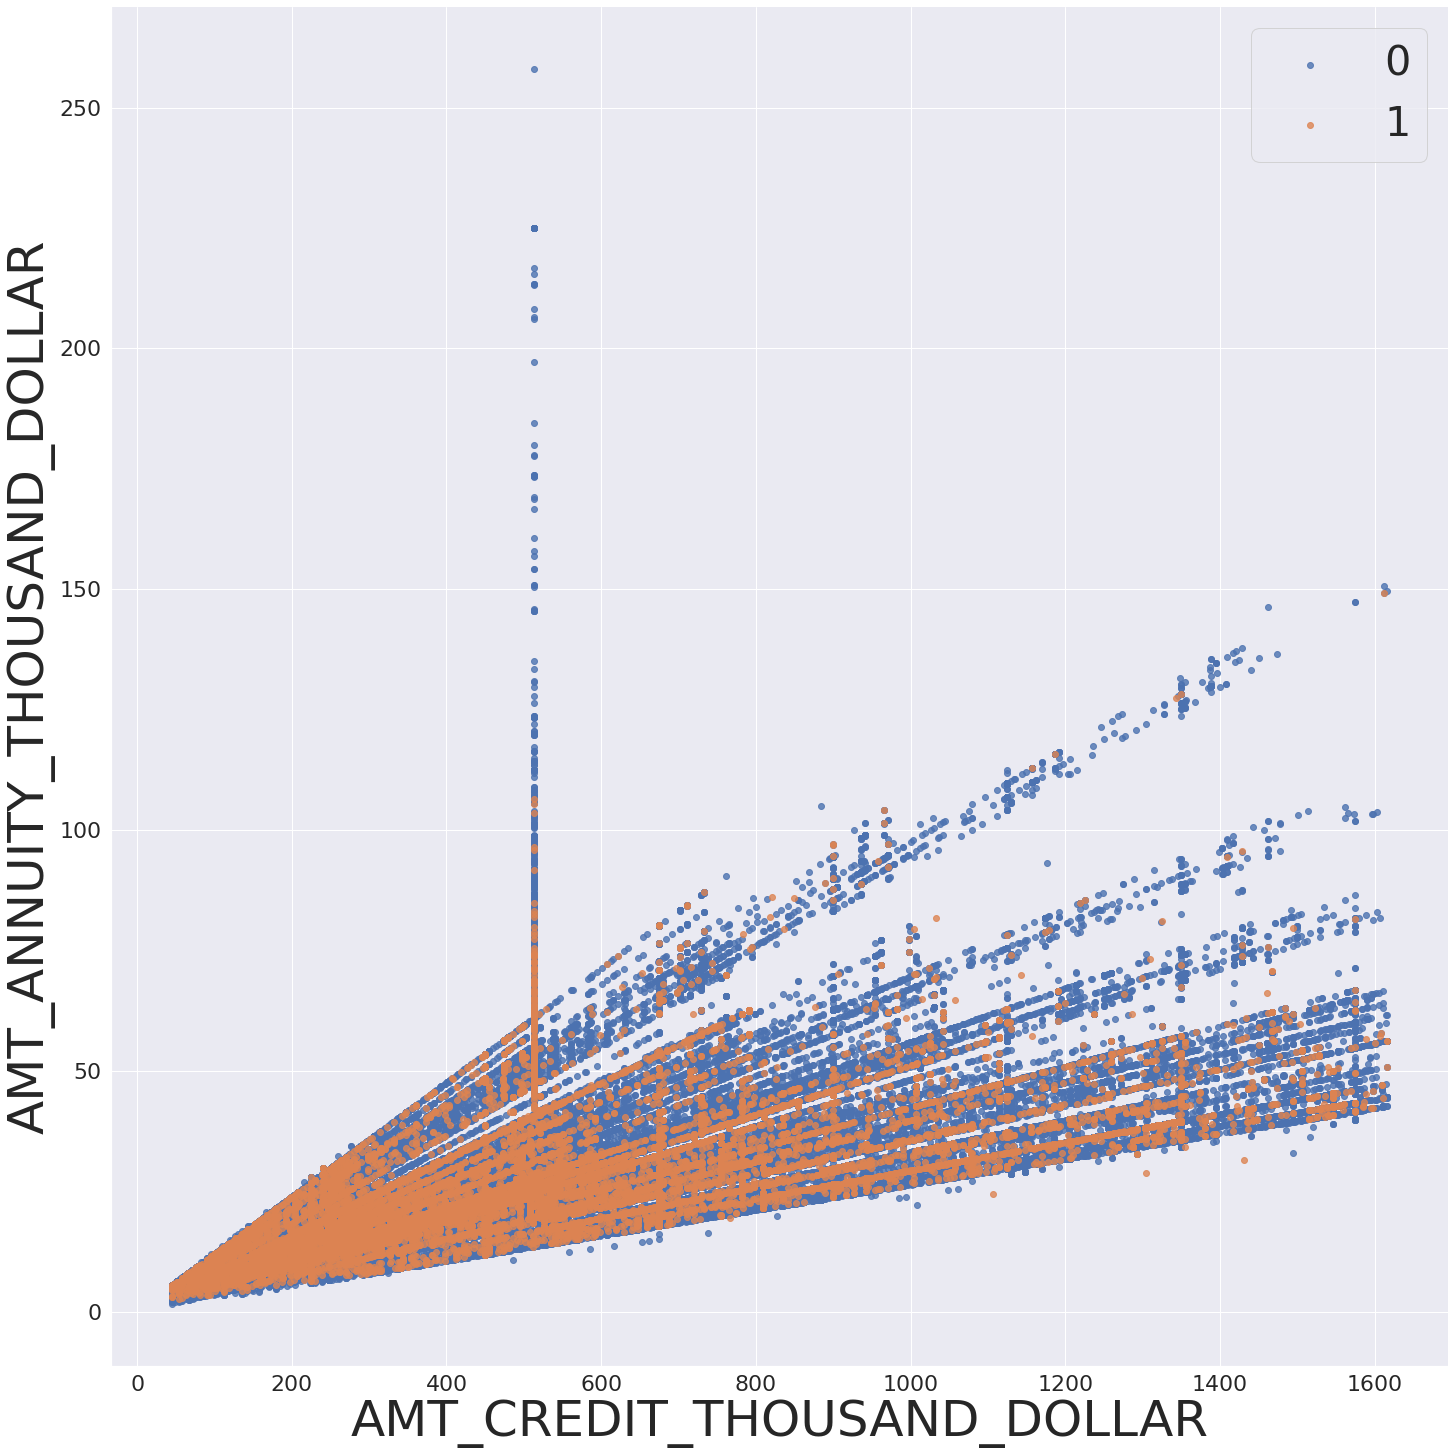

In [22]:
sns.set(font_scale = 2)

ax = sns.lmplot(x="AMT_CREDIT_THOUSAND_DOLLAR", y="AMT_ANNUITY_THOUSAND_DOLLAR", 
                data=train_dataset, fit_reg=False, hue='TARGET', height=20, legend=False)
plt.legend(loc='upper right', fontsize = 'xx-large')

ax.set_xlabels("AMT_CREDIT_THOUSAND_DOLLAR",fontsize=50)
ax.set_ylabels("AMT_ANNUITY_THOUSAND_DOLLAR",fontsize=50)

plt.show()

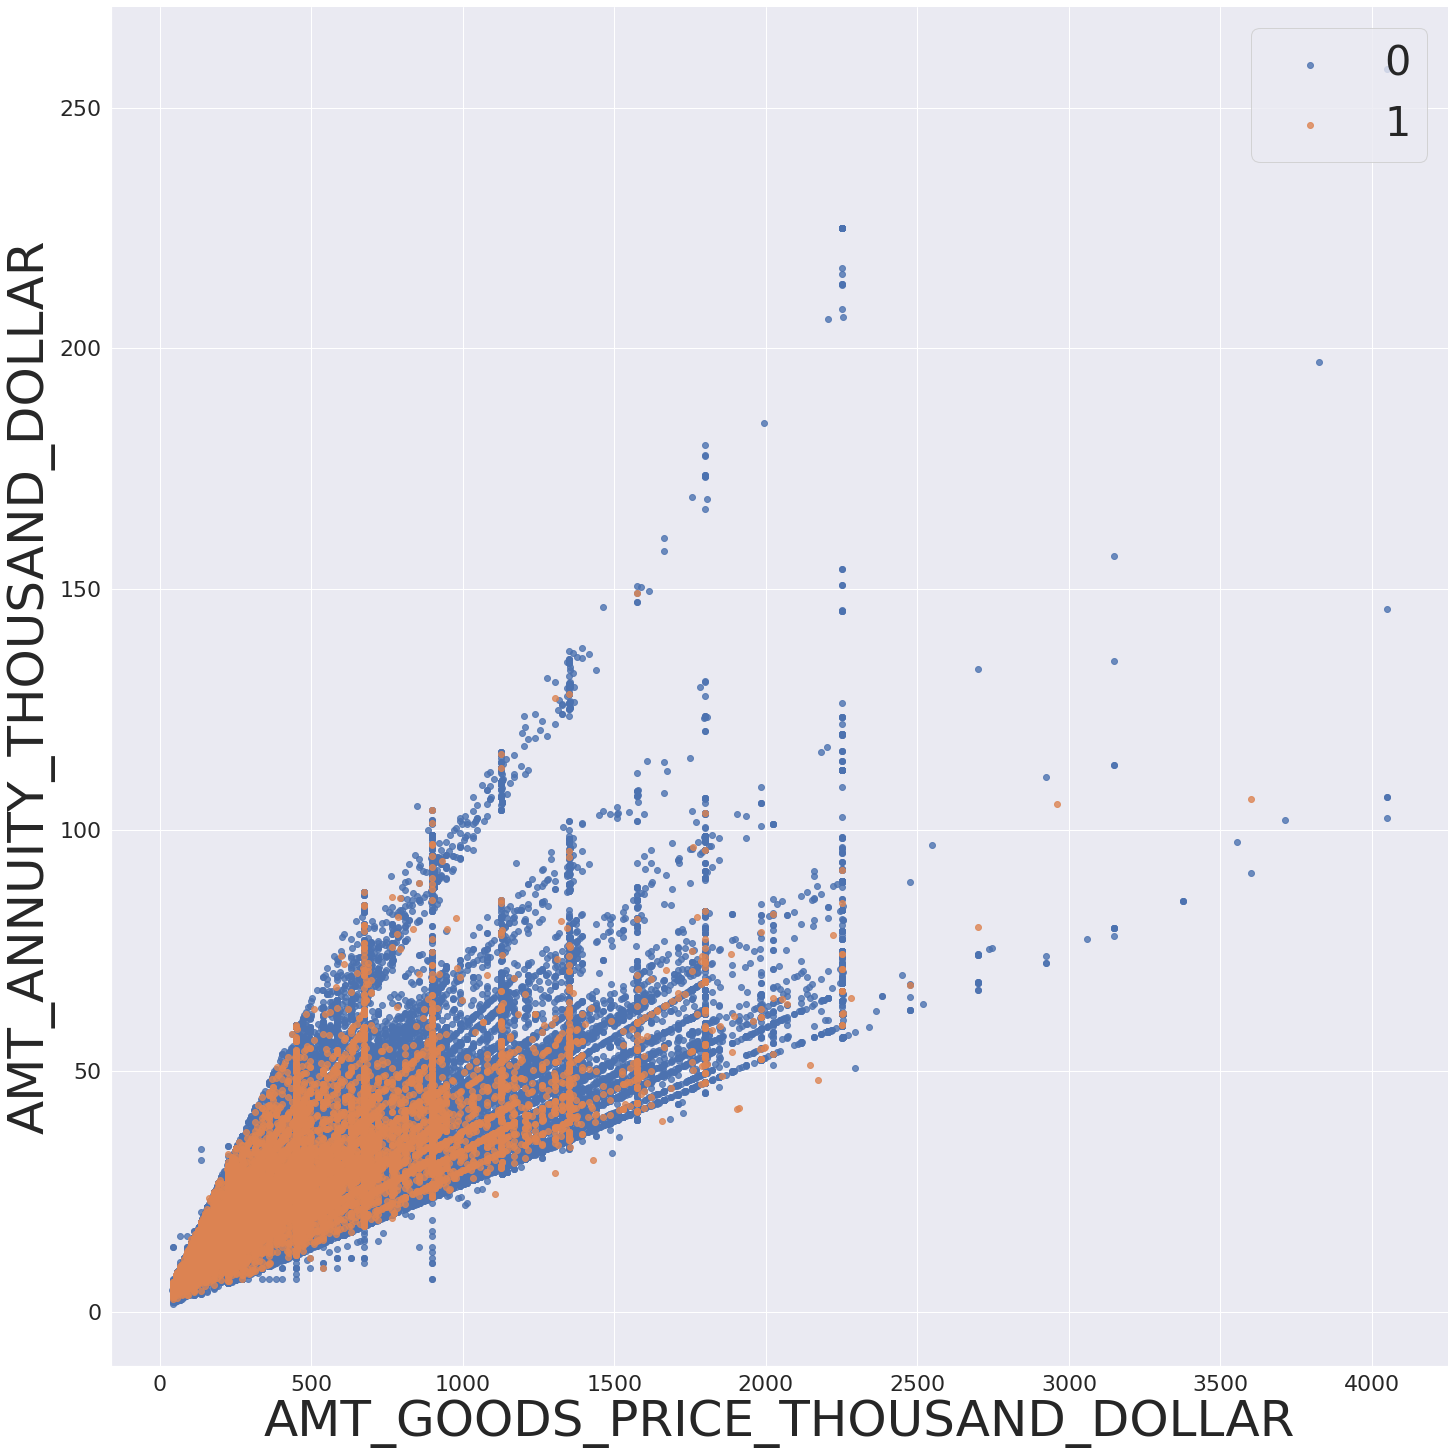

In [23]:
sns.set(font_scale = 2)

ax = sns.lmplot(x="AMT_GOODS_PRICE_THOUSAND_DOLLAR", y="AMT_ANNUITY_THOUSAND_DOLLAR", 
                data=train_dataset, fit_reg=False, hue='TARGET', height=20, legend=False)
plt.legend(loc='upper right', fontsize = 'xx-large')

ax.set_xlabels("AMT_GOODS_PRICE_THOUSAND_DOLLAR",fontsize=50)
ax.set_ylabels("AMT_ANNUITY_THOUSAND_DOLLAR",fontsize=50)

plt.show()

# Missing Values for main application_train

### First, we have to import the test data set, so whichever feature engineering we do on the train dataset, we do the same thing on the test dataset

In [28]:
# Test data
test_dataset = pd.read_csv('Dataset/Home Credit Default Rate/application_test.csv')

print('Test data shape: ', test_dataset.shape)

test_dataset.head()

Test data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

In [29]:
test_dataset['DAYS_BIRTH'] = (test_dataset['DAYS_BIRTH']*(-1))/365.25
test_dataset['DAYS_EMPLOYED'] = (test_dataset['DAYS_EMPLOYED']*(-1))/365.25
test_dataset['AMT_INCOME_TOTAL'] = test_dataset['AMT_INCOME_TOTAL']/1000
test_dataset['AMT_CREDIT'] = test_dataset['AMT_CREDIT']/1000
test_dataset['AMT_ANNUITY'] = test_dataset['AMT_ANNUITY']/1000
test_dataset['AMT_GOODS_PRICE'] = test_dataset['AMT_GOODS_PRICE']/1000

test_dataset = test_dataset.rename(columns={'DAYS_BIRTH': 'YEAR_BIRTH', 
                                            'DAYS_EMPLOYED': 'YEAR_EMPLOYED',
                                            'AMT_INCOME_TOTAL': 'AMT_INCOME_TOTAL_THOUSAND_DOLLAR', 
                                            'AMT_CREDIT': 'AMT_CREDIT_THOUSAND_DOLLAR', 
                                            'AMT_ANNUITY': 'AMT_ANNUITY_THOUSAND_DOLLAR', 
                                            'AMT_GOODS_PRICE': 'AMT_GOODS_PRICE_THOUSAND_DOLLAR'})
test_dataset.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL_THOUSAND_DOLLAR,AMT_CREDIT_THOUSAND_DOLLAR,AMT_ANNUITY_THOUSAND_DOLLAR,AMT_GOODS_PRICE_THOUSAND_DOLLAR,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEAR_BIRTH,YEAR_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135.0,568.800,20.5605,450.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,52.678987,6.376454,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99.0,222.768,17.3700,180.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,49.456537,12.235455,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202.5,663.264,69.7770,630.0,NaN,Working,Higher education,Married,House / apartment,0.019101,54.861054,12.205339,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315.0,1575.000,49.0185,1575.0,Una

In [30]:
# NAME_CONTRACT_TYPE
test_dataset['NAME_CONTRACT_TYPE'] = np.where(test_dataset['NAME_CONTRACT_TYPE'] == 'Revolving loans', 1, 0)
# CODE_GENDER
test_dataset['CODE_GENDER'] = np.where(test_dataset['CODE_GENDER'] == "XNA", None, test_dataset['CODE_GENDER'])

### Deal with missing value

In [24]:
pd.set_option('display.max_columns', None)
train_dataset.describe()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CNT_CHILDREN,AMT_INCOME_TOTAL_THOUSAND_DOLLAR,AMT_CREDIT_THOUSAND_DOLLAR,AMT_ANNUITY_THOUSAND_DOLLAR,AMT_GOODS_PRICE_THOUSAND_DOLLAR,REGION_POPULATION_RELATIVE,AGE,YEAR_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,306914.000000,306914.000000,306914.000000,306914.000000,306914.000000,306914.000000,306902.000000,306636.000000,306914.000000,306914.000000,306914.000000,306914.000000,306914.000000,104180.000000,306914.000000,306914.000000,306914.000000,306914.000000,306914.000000,306914.000000,306912.000000,306914.000000,306914.000000,306914.000000,306914.000000,306914.000000,306914.000000,306914.000000,306914.000000,306914.000000,133819.000000,3.062540e+05,246075.000000,151047.000000,127207.000000,157093.000000,102718.000000,92374.000000,143234.000000,152278.000000,154084.000000,98579.000000,124584.000000,97027.000000,152755.000000,93719.000000,137453.000000,151047.000000,127207.000000,157093.000000,102718.000000,92374.000000,143234.000000,152278.000000,154084.000000,98579.000000,124584.000000,97027.000000,152755.000000,93719.000000,137453.000000,151047.000000,127207.000000,157093.000000,102718.000000,92374.000000,143234.000000,152278.000000,154084.000000,98579.000000,124584.000000,97027.000000,152755.000000,93719.000000,137453.000000,158665.000000,305906.000000,305906.000000,305906.000000,305906.000000,306913.000000,306914.000000,306914.000000,306914.000000,306914.000000,306914.000000,306914.000000,306914.000000,306914.000000,306914.000000,306914.000000,306914.000000,306914.000000,306914.000000,306914.000000,306914.000000,306914.000000,306914.000000,306914.000000,306914.000000,306914.000000,265479.000000,265479.000000,265479.000000,265479.000000,265479.000000,265479.000000
mean,278187.962019,0.080772,0.094877,0.416208,166.429475,568.308932,27.051425,537.343003,0.020845,43.909212,5.348699,-4988.116407,-2994.336091,12.083202,0.999997,0.819624,0.199342,0.998175,0.280961,0.056566,2.151757,2.053155,2.032224,12.061636,0.015102,0.050614,0.040516,0.078204,0.230534,0.179591,0.501930,5.142255e-01,0.510896,0.117298,0.088375,0.977720,0.752386,0.044511,0.078694,0.149715,0.225969,0.231636,0.066330,0.100636,0.107215,0.008760,0.028237,0.114101,0.087491,0.977050,0.759563,0.042452,0.074259,0.1451

In [25]:
column_names = list(train_dataset.columns) 

In [26]:
missing_value = train_dataset.isnull().sum()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
mv_perc = missing_value/len(train_dataset)
list_of_tuples = list(zip(column_names,missing_value, mv_perc)) 
train_mv_df = pd.DataFrame(data=list_of_tuples, columns = ['Columns','Missing values', 'Percentage'])
train_mv_df

,Columns,Missing values,Percentage
0,SK_ID_CURR,0,0.000000
1,TARGET,0,0.000000
2,NAME_CONTRACT_TYPE,0,0.000000
3,CODE_GENDER,0,0.000000
4,FLAG_OWN_CAR,0,0.000000
5,FLAG_OWN_REALTY,0,0.000000
6,CNT_CHILDREN,0,0.000000
7,AMT_INCOME_TOTAL_THOUSAND_DOLLAR,0,0.000000
8,AMT_CREDIT_THOUSAND_DOLLAR,0,0.000000
9,AMT_ANNUITY_THOUSAND_DOLLAR,12,0.000039


In [27]:
type(train_mv_df)

pandas.core.frame.DataFrame

_We can see that all columns for Normalized information about building where the client lives have around 50% missing values. These columns, thus, are not trutworthy and for the sake of simplicity, I will get rid of all columns that have more than 45% missing value (except for APARTMENT_AVG)_

In [35]:
drop_cols = []

for index, row in train_mv_df.iterrows():
    if row['Percentage'] > 0.45:
        drop_cols.append(row['Columns'])
        
print(drop_cols)

['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE

In [37]:
drop_cols.remove('APARTMENTS_AVG')

In [38]:
train_dataset = train_dataset.drop(columns=drop_cols)
train_dataset.shape

(306914, 74)

In [39]:
test_dataset = test_dataset.drop(columns=drop_cols)
test_dataset.shape

(48744, 73)

In [40]:
missing_value = train_dataset.isnull().sum()
column_names = list(train_dataset.columns) 
mv_perc = missing_value/len(train_dataset)
list_of_tuples = list(zip(column_names,missing_value, mv_perc)) 
train_mv_df = pd.DataFrame(data=list_of_tuples, columns = ['Columns','Missing values', 'Percentage'])
train_mv_df

,Columns,Missing values,Percentage
0,SK_ID_CURR,0,0.000000
1,TARGET,0,0.000000
2,NAME_CONTRACT_TYPE,0,0.000000
3,CODE_GENDER,0,0.000000
4,FLAG_OWN_CAR,0,0.000000
5,FLAG_OWN_REALTY,0,0.000000
6,CNT_CHILDREN,0,0.000000
7,AMT_INCOME_TOTAL_THOUSAND_DOLLAR,0,0.000000
8,AMT_CREDIT_THOUSAND_DOLLAR,0,0.000000
9,AMT_ANNUITY_THOUSAND_DOLLAR,12,0.000039


In [41]:
missing_value = test_dataset.isnull().sum()
column_names = list(test_dataset.columns) 
mv_perc = missing_value/len(test_dataset)
list_of_tuples = list(zip(column_names,missing_value, mv_perc)) 
test_mv_df = pd.DataFrame(data=list_of_tuples, columns = ['Columns','Missing values', 'Percentage'])
test_mv_df

,Columns,Missing values,Percentage
0,SK_ID_CURR,0,0.000000
1,NAME_CONTRACT_TYPE,0,0.000000
2,CODE_GENDER,0,0.000000
3,FLAG_OWN_CAR,0,0.000000
4,FLAG_OWN_REALTY,0,0.000000
5,CNT_CHILDREN,0,0.000000
6,AMT_INCOME_TOTAL_THOUSAND_DOLLAR,0,0.000000
7,AMT_CREDIT_THOUSAND_DOLLAR,0,0.000000
8,AMT_ANNUITY_THOUSAND_DOLLAR,24,0.000492
9,AMT_GOODS_PRICE_THOUSAND_DOLLAR,0,0.000000


# Join/ Merge dataset

### We will join the main dataset with previous_application.csv first

**previous_application.csv**

* All previous applications for Home Credit loans of clients who have loans in our sample.
* There is one row for each previous application related to loans in our data sample.

In [42]:
previous_application = pd.read_csv('Dataset/Home Credit Default Rate/previous_application.csv')

print('Previous_application shape: ', previous_application.shape)

previous_application.head()

Previous_application shape:  (1670214, 37)


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


_We also want to know about the missing value situation of previous application_

In [45]:
missing_value = previous_application.isnull().sum()
column_names = list(previous_application.columns) 
mv_perc = missing_value/len(previous_application)
list_of_tuples = list(zip(column_names,missing_value, mv_perc)) 
pre_app_mv_df = pd.DataFrame(data=list_of_tuples, columns = ['Columns','Missing values', 'Percentage'])
pre_app_mv_df['Percentage'] = pre_app_mv_df['Percentage']*100
pre_app_mv_df

,Columns,Missing values,Percentage
0,SK_ID_PREV,0,0.000000
1,SK_ID_CURR,0,0.000000
2,NAME_CONTRACT_TYPE,0,0.000000
3,AMT_ANNUITY,372235,22.286665
4,AMT_APPLICATION,0,0.000000
5,AMT_CREDIT,1,0.000060
6,AMT_DOWN_PAYMENT,895844,53.636480
7,AMT_GOODS_PRICE,385515,23.081773
8,WEEKDAY_APPR_PROCESS_START,0,0.000000
9,HOUR_APPR_PROCESS_START,0,0.000000


_For this dataset, we will also get rid of all the columns with more than 40% missing value_

In [46]:
drop_cols = []

for index, row in pre_app_mv_df.iterrows():
    if row['Percentage'] > 40:
        drop_cols.append(row['Columns'])
        
print(drop_cols)

['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


In [47]:
previous_application = previous_application.drop(columns=drop_cols)
previous_application.shape

(1670214, 26)

**_Actually merger the datasets_**

In [63]:
merged_train_dataset = pd.merge(train_dataset,previous_application,on='SK_ID_CURR',how='left')

print(merged_train_dataset.shape)
print("In GB: " + str(merged_train_dataset.memory_usage(index=True).sum()/1000000000))

(1428097, 99)
In GB: 1.1424776


In [59]:
merged_train_dataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL_THOUSAND_DOLLAR,AMT_CREDIT_THOUSAND_DOLLAR,AMT_ANNUITY_THOUSAND_DOLLAR,AMT_GOODS_PRICE_THOUSAND_DOLLAR,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEAR_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,0,M,N,Y,0,202.5,406.5975,24.7005,351.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.902806,1.744011,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.0247,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1038818.0,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9.0,Y,1.0,XAP,Approved,-606.0,XNA,XAP,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,0,F,N,N,0,270.0,1293.5025,35.6985,1129.5,Family,State servant,Higher education,Married,House / apartment,0.003541,45.900068,3.252567,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.0959,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1810518.0,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12.0,Y,1.0,XNA,Approved,-746.0,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,0,F,N,N,0,270.0,1293.5025,35.6985,1129.5,Family,State servant,Higher education,Married,House / apartment,0.003541,45.900068,3.252567,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.0959,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2636178.0,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17.0,Y,1.0,XAP,Approved,-828.0,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest
3,100003,0,0,F,N,N,0,270.0,1293.5025,35.6985,1129.5,Family,State servant,Higher education,Married,House / apartment,0.003541,45.900068,3.252567,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.0959,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2396755.0,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15.0,Y,1.0,XAP,Approved,-2341.0,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,

In [62]:
merged_test_dataset = pd.merge(test_dataset,previous_application,on='SK_ID_CURR',how='left')

print(merged_test_dataset.shape)
print("In GB: " + str(merged_test_dataset.memory_usage(index=True).sum()/1000000000))

(257457, 98)
In GB: 0.203905944


In [64]:
merged_test_dataset.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL_THOUSAND_DOLLAR,AMT_CREDIT_THOUSAND_DOLLAR,AMT_ANNUITY_THOUSAND_DOLLAR,AMT_GOODS_PRICE_THOUSAND_DOLLAR,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEAR_BIRTH,YEAR_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100001,0,F,N,Y,0,135.0,568.800,20.5605,450.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,52.678987,6.376454,-5170.0,-812,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.789654,0.159520,0.066,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1369693.0,Consumer loans,3951.000,24835.5,23787.0,24835.5,FRIDAY,13.0,Y,1.0,XAP,Approved,-1740.0,Cash through the bank,XAP,Refreshed,Mobile,POS,XNA,Country-wide,23.0,Connectivity,8.0,high,POS mobile with interest
1,100005,0,M,N,Y,0,99.0,222.768,17.3700,180.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,49.456537,12.235455,-9118.0,-1623,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.291656,0.432962,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,1857999.0,Cash loans,NaN,0.0,0.0,NaN,FRIDAY,10.0,Y,1.0,XNA,Canceled,-315.0,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1.0,XNA,NaN,XNA,Cash
2,100005,0,M,N,Y,0,99.0,222.768,17.3700,180.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,49.456537,12.235455,-9118.0,-1623,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.291656,0.432962,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,2495675.0,Consumer loans,4813.200,44617.5,40153.5,44617.5,THURSDAY,11.0,Y,1.0,XAP,Approved,-757.0,Cash through the bank,XAP,New,Mobile,POS,XNA,Country-wide,37.0,Connectivity,12.0,high,POS mobile with interest
3,100013,0,M,Y,Y,0,202.5,663.264,69.7770,630.0,NaN,Working,Higher education,Married,House / apartment,0.019101,54.861054,12.205339,-2175.0,-3503,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,0.699787,0.610991,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0,1865796.0,Consumer loans,6538.185,51030.0,47934.0,51030.0,THURSDAY,12.0,Y,1.0,XAP,Approved,-1999.0,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Stone,30.0,Connectivity,10.0,high,POS mobile with inter

In [65]:
# delete this dataset so it doesn't take up all the RAM
del(previous_application)

In [67]:
missing_value = merged_train_dataset.isnull().sum()
column_names = list(merged_train_dataset.columns) 
mv_perc = missing_value/len(merged_train_dataset)
list_of_tuples = list(zip(column_names,missing_value, mv_perc)) 
merged_train_mv_df = pd.DataFrame(data=list_of_tuples, columns = ['Columns','Missing values', 'Percentage'])
merged_train_mv_df['Percentage'] = merged_train_mv_df['Percentage']*100
merged_train_mv_df

,Columns,Missing values,Percentage
0,SK_ID_CURR,0,0.000000
1,TARGET,0,0.000000
2,NAME_CONTRACT_TYPE_x,0,0.000000
3,CODE_GENDER,0,0.000000
4,FLAG_OWN_CAR,0,0.000000
5,FLAG_OWN_REALTY,0,0.000000
6,CNT_CHILDREN,0,0.000000
7,AMT_INCOME_TOTAL_THOUSAND_DOLLAR,0,0.000000
8,AMT_CREDIT_THOUSAND_DOLLAR,0,0.000000
9,AMT_ANNUITY_THOUSAND_DOLLAR,93,0.006512


In [68]:
# delete this dataset so it doesn't take up all the RAM
del(train_dataset)

In [69]:
# delete this dataset so it doesn't take up all the RAM
del(test_dataset)

In [80]:
missing_value = merged_test_dataset.isnull().sum()
column_names = list(merged_test_dataset.columns) 
mv_perc = missing_value/len(merged_test_dataset)
list_of_tuples = list(zip(column_names, missing_value, mv_perc)) 
merged_test_mv_df = pd.DataFrame(data=list_of_tuples, columns = ['Columns','Missing values', 'Percentage'])
merged_test_mv_df['Percentage'] = merged_test_mv_df['Percentage']*100
merged_test_mv_df

,Columns,Missing values,Percentage
0,SK_ID_CURR,0,0.000000
1,NAME_CONTRACT_TYPE_x,0,0.000000
2,CODE_GENDER,0,0.000000
3,FLAG_OWN_CAR,0,0.000000
4,FLAG_OWN_REALTY,0,0.000000
5,CNT_CHILDREN,0,0.000000
6,AMT_INCOME_TOTAL_THOUSAND_DOLLAR,0,0.000000
7,AMT_CREDIT_THOUSAND_DOLLAR,0,0.000000
8,AMT_ANNUITY_THOUSAND_DOLLAR,124,0.048163
9,AMT_GOODS_PRICE_THOUSAND_DOLLAR,0,0.000000


# Missing values for merged_train_dataset

### Deal with MNAR (Missing not at random)

_Seems like the missing values of feature number 80 to 96 are missing not at random (MNAR). However, for the sake of simplicity, I will get rid of them row-wise_

In [70]:
merged_train_dataset.WEEKDAY_APPR_PROCESS_START_y.value_counts()

WEDNESDAY    215272
TUESDAY      214765
MONDAY       214207
FRIDAY       213075
THURSDAY     210702
SATURDAY     203908
SUNDAY       139888
Name: WEEKDAY_APPR_PROCESS_START_y, dtype: int64

In [71]:
merged_train_dataset['WEEKDAY_APPR_PROCESS_START_y'].isnull().sum()

16280

In [78]:
merged_train_dataset.dropna(subset=['WEEKDAY_APPR_PROCESS_START_y'], inplace=True)
merged_train_dataset.shape

(1411817, 99)

In [79]:
missing_value = merged_train_dataset.isnull().sum()
column_names = list(merged_train_dataset.columns) 
mv_perc = missing_value/len(merged_train_dataset)
list_of_tuples = list(zip(column_names,missing_value, mv_perc)) 
merged_train_mv_df = pd.DataFrame(data=list_of_tuples, columns = ['Columns','Missing values', 'Percentage'])
merged_train_mv_df['Percentage'] = merged_train_mv_df['Percentage']*100
merged_train_mv_df

,Columns,Missing values,Percentage
0,SK_ID_CURR,0,0.000000
1,TARGET,0,0.000000
2,NAME_CONTRACT_TYPE_x,0,0.000000
3,CODE_GENDER,0,0.000000
4,FLAG_OWN_CAR,0,0.000000
5,FLAG_OWN_REALTY,0,0.000000
6,CNT_CHILDREN,0,0.000000
7,AMT_INCOME_TOTAL_THOUSAND_DOLLAR,0,0.000000
8,AMT_CREDIT_THOUSAND_DOLLAR,0,0.000000
9,AMT_ANNUITY_THOUSAND_DOLLAR,93,0.006587


In [81]:
merged_test_dataset.dropna(subset=['WEEKDAY_APPR_PROCESS_START_y'], inplace=True)
merged_test_dataset.shape

(256513, 98)

### Deleting missing value columns wise 

_On another thought, I will get rid of column APARTMENTS_AVG and CNT_PAYMENT since they both have high percentage of missing value and they are not as important as other features_

In [82]:
merged_train_dataset = merged_train_dataset.drop(columns=['APARTMENTS_AVG', 'CNT_PAYMENT'])
merged_test_dataset = merged_test_dataset.drop(columns=['APARTMENTS_AVG', 'CNT_PAYMENT'])
print('Train data shape: ', merged_train_dataset.shape)
print('Test data shape: ', merged_test_dataset.shape)

Train data shape:  (1411817, 97)
Test data shape:  (256513, 96)


### Filling missing values for AMT_ANNUITY and AMT_GOODS_PRICE

##### _Thanks to the plot in the beginning of this notebook, we can see that there is a strong correlation between 3 feautures:  AMT_ANNUITY, AMT_GOODS_PRICE, AMT_CREDIT. I will run a linear regression between them three to fill in the missing values_

In [83]:
merged_train_dataset = merged_train_dataset.rename(columns={'AMT_CREDIT': 'PREV_AMT_CREDIT_THOUSAND_DOLLAR',
                                                            'AMT_ANNUITY': 'PREV_AMT_ANNUITY_THOUSAND_DOLLAR', 
                                                            'AMT_GOODS_PRICE': 'PREV_AMT_GOODS_PRICE_THOUSAND_DOLLAR'})

merged_test_dataset = merged_test_dataset.rename(columns={'AMT_CREDIT': 'PREV_AMT_CREDIT_THOUSAND_DOLLAR',
                                                          'AMT_ANNUITY': 'PREV_AMT_ANNUITY_THOUSAND_DOLLAR', 
                                                          'AMT_GOODS_PRICE': 'PREV_AMT_GOODS_PRICE_THOUSAND_DOLLAR'})

In [84]:
merged_train_dataset['PREV_AMT_CREDIT_THOUSAND_DOLLAR'] = merged_train_dataset['PREV_AMT_CREDIT_THOUSAND_DOLLAR']/1000
merged_train_dataset['PREV_AMT_ANNUITY_THOUSAND_DOLLAR'] = merged_train_dataset['PREV_AMT_ANNUITY_THOUSAND_DOLLAR']/1000
merged_train_dataset['PREV_AMT_GOODS_PRICE_THOUSAND_DOLLAR'] = merged_train_dataset['PREV_AMT_GOODS_PRICE_THOUSAND_DOLLAR']/1000

merged_test_dataset['PREV_AMT_CREDIT_THOUSAND_DOLLAR'] = merged_test_dataset['PREV_AMT_CREDIT_THOUSAND_DOLLAR']/1000
merged_test_dataset['PREV_AMT_ANNUITY_THOUSAND_DOLLAR'] = merged_test_dataset['PREV_AMT_ANNUITY_THOUSAND_DOLLAR']/1000
merged_test_dataset['PREV_AMT_GOODS_PRICE_THOUSAND_DOLLAR'] = merged_test_dataset['PREV_AMT_GOODS_PRICE_THOUSAND_DOLLAR']/1000

merged_train_dataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL_THOUSAND_DOLLAR,AMT_CREDIT_THOUSAND_DOLLAR,AMT_ANNUITY_THOUSAND_DOLLAR,AMT_GOODS_PRICE_THOUSAND_DOLLAR,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEAR_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,PREV_AMT_ANNUITY_THOUSAND_DOLLAR,AMT_APPLICATION,PREV_AMT_CREDIT_THOUSAND_DOLLAR,PREV_AMT_GOODS_PRICE_THOUSAND_DOLLAR,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,0,M,N,Y,0,202.5,406.5975,24.7005,351.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.902806,1.744011,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1038818.0,Consumer loans,9.251775,179055.0,179.0550,179.0550,SATURDAY,9.0,Y,1.0,XAP,Approved,-606.0,XNA,XAP,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,low_normal,POS other with interest
1,100003,0,0,F,N,N,0,270.0,1293.5025,35.6985,1129.5,Family,State servant,Higher education,Married,House / apartment,0.003541,45.900068,3.252567,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1810518.0,Cash loans,98.356995,900000.0,1035.8820,900.0000,FRIDAY,12.0,Y,1.0,XNA,Approved,-746.0,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,low_normal,Cash X-Sell: low
2,100003,0,0,F,N,N,0,270.0,1293.5025,35.6985,1129.5,Family,State servant,Higher education,Married,House / apartment,0.003541,45.900068,3.252567,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2636178.0,Consumer loans,64.567665,337500.0,348.6375,337.5000,SUNDAY,17.0,Y,1.0,XAP,Approved,-828.0,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,middle,POS industry with interest
3,100003,0,0,F,N,N,0,270.0,1293.5025,35.6985,1129.5,Family,State servant,Higher education,Married,House / apartment,0.003541,45.900068,3.252567,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2396755.0,Consumer loans,6.737310,68809.5,68.0535,68.8095,SATURDAY,15.0,Y,1.0,XAP,Approved,-2341.0,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Countr

Forgot about AMT_APPLICATION

In [86]:
merged_train_dataset = merged_train_dataset.rename(columns={'AMT_APPLICATION': 'PREV_AMT_APPLICATION_THOUSAND_DOLLAR'})
merged_train_dataset['PREV_AMT_APPLICATION_THOUSAND_DOLLAR'] = merged_train_dataset['PREV_AMT_APPLICATION_THOUSAND_DOLLAR']/1000

merged_test_dataset = merged_test_dataset.rename(columns={'AMT_APPLICATION': 'PREV_AMT_APPLICATION_THOUSAND_DOLLAR'})
merged_test_dataset['PREV_AMT_APPLICATION_THOUSAND_DOLLAR'] = merged_test_dataset['PREV_AMT_APPLICATION_THOUSAND_DOLLAR']/1000 

In [89]:
# a list of all the features we will run linear regression
lin_reg_impute_df = pd.DataFrame()
lin_reg_cols = ['AMT_CREDIT_THOUSAND_DOLLAR', 'AMT_ANNUITY_THOUSAND_DOLLAR', 'AMT_GOODS_PRICE_THOUSAND_DOLLAR', 
                'PREV_AMT_CREDIT_THOUSAND_DOLLAR', 'PREV_AMT_ANNUITY_THOUSAND_DOLLAR', 
                'PREV_AMT_GOODS_PRICE_THOUSAND_DOLLAR']

for col in lin_reg_cols:
    lin_reg_impute_df[col] = merged_train_dataset[col]
    
print(lin_reg_impute_df.shape)
lin_reg_impute_df.head()

(1411817, 6)


,AMT_CREDIT_THOUSAND_DOLLAR,AMT_ANNUITY_THOUSAND_DOLLAR,AMT_GOODS_PRICE_THOUSAND_DOLLAR,PREV_AMT_CREDIT_THOUSAND_DOLLAR,PREV_AMT_ANNUITY_THOUSAND_DOLLAR,PREV_AMT_GOODS_PRICE_THOUSAND_DOLLAR
0,406.5975,24.7005,351.0,179.0550,9.251775,179.0550
1,1293.5025,35.6985,1129.5,1035.8820,98.356995,900.0000
2,1293.5025,35.6985,1129.5,348.6375,64.567665,337.5000
3,1293.5025,35.6985,1129.5,68.0535,6.737310,68.8095
4,135.0000,6.7500,135.0,20.1060,5.357250,24.2820


In [90]:
missing_value = lin_reg_impute_df.isnull().sum()
mv_perc = missing_value/len(lin_reg_impute_df)
list_of_tuples = list(zip(lin_reg_cols,missing_value, mv_perc)) 
merged_train_mv_df = pd.DataFrame(data=list_of_tuples, columns = ['Columns','Missing values', 'Percentage'])
merged_train_mv_df['Percentage'] = merged_train_mv_df['Percentage']*100
merged_train_mv_df

,Columns,Missing values,Percentage
0,AMT_CREDIT_THOUSAND_DOLLAR,0,0.000000
1,AMT_ANNUITY_THOUSAND_DOLLAR,93,0.006587
2,AMT_GOODS_PRICE_THOUSAND_DOLLAR,1208,0.085563
3,PREV_AMT_CREDIT_THOUSAND_DOLLAR,1,0.000071
4,PREV_AMT_ANNUITY_THOUSAND_DOLLAR,306870,21.735820
5,PREV_AMT_GOODS_PRICE_THOUSAND_DOLLAR,319141,22.604984


In [100]:
from sklearn.linear_model import LinearRegression

lin_reg_impute_df.dropna(subset=['AMT_ANNUITY_THOUSAND_DOLLAR', 'AMT_GOODS_PRICE_THOUSAND_DOLLAR'], inplace=True)
print("After: {0}".format(lin_reg_impute_df.shape))

After: (1410516, 6)


In [101]:
X = lin_reg_impute_df['AMT_CREDIT_THOUSAND_DOLLAR']
y = lin_reg_impute_df['AMT_ANNUITY_THOUSAND_DOLLAR']

print(X.shape, y.shape)

(1410516,) (1410516,)


In [105]:
X = X.to_numpy()
y = y.to_numpy()

print("Shape of X and y are {0} and {1}". format(X.shape, y.shape))
print("Type of X and y are {0} and {1}". format(type(X), type(y)))

Shape of X and y are (1410516,) and (1410516,)
Type of X and y are <class 'numpy.ndarray'> and <class 'numpy.ndarray'>


In [106]:
X = np.reshape(X, (-1,1))
y = np.reshape(y, (-1,1))

print("Shape of X and y are {0} and {1}". format(X.shape, y.shape))

Shape of X and y are (1410516, 1) and (1410516, 1)


In [108]:
reg = LinearRegression().fit(X, y)
print(reg.coef_)
print(reg.intercept_)

[[0.02791609]]
[11.24112064]


**y = 0.028*X + 11.24**

_Now we can fill out the missing value in annuity column in merged_train_dataset_

In [111]:
merged_train_dataset['AMT_ANNUITY_THOUSAND_DOLLAR'] = merged_train_dataset.apply(
    lambda row: (0.028*row['AMT_CREDIT_THOUSAND_DOLLAR']+11.24) if np.isnan(row['AMT_ANNUITY_THOUSAND_DOLLAR']) else row['AMT_ANNUITY_THOUSAND_DOLLAR'],
    axis=1
)

In [180]:
merged_test_dataset['AMT_ANNUITY_THOUSAND_DOLLAR'] = merged_test_dataset.apply(
    lambda row: (0.028*row['AMT_CREDIT_THOUSAND_DOLLAR']+11.24) if np.isnan(row['AMT_ANNUITY_THOUSAND_DOLLAR']) else row['AMT_ANNUITY_THOUSAND_DOLLAR'],
    axis=1
)

In [182]:
mv_df = missing_value(merged_test_dataset)
mv_df

,Columns,Missing values,Percentage
0,SK_ID_CURR,0,0.000000
1,NAME_CONTRACT_TYPE_x,0,0.000000
2,CODE_GENDER,0,0.000000
3,FLAG_OWN_CAR,0,0.000000
4,FLAG_OWN_REALTY,0,0.000000
5,CNT_CHILDREN,0,0.000000
6,AMT_INCOME_TOTAL_THOUSAND_DOLLAR,0,0.000000
7,AMT_CREDIT_THOUSAND_DOLLAR,0,0.000000
8,AMT_ANNUITY_THOUSAND_DOLLAR,0,0.000000
9,AMT_GOODS_PRICE_THOUSAND_DOLLAR,0,0.000000


**Since we will be looking into missing value a lot, let's create a function for it**

In [124]:
def missing_value(df): 
    missing_value = df.isnull().sum()
    column_names = list(df.columns)
    mv_perc = missing_value/len(df)
    list_of_tuples = list(zip(column_names,missing_value, mv_perc)) 
    mv_df = pd.DataFrame(data=list_of_tuples, columns = ['Columns','Missing values', 'Percentage'])
    mv_df['Percentage'] = mv_df['Percentage']*100
    return mv_df

In [125]:
mv_df = missing_value(merged_train_dataset)
mv_df

,Columns,Missing values,Percentage
0,SK_ID_CURR,0,0.000000
1,TARGET,0,0.000000
2,NAME_CONTRACT_TYPE_x,0,0.000000
3,CODE_GENDER,0,0.000000
4,FLAG_OWN_CAR,0,0.000000
5,FLAG_OWN_REALTY,0,0.000000
6,CNT_CHILDREN,0,0.000000
7,AMT_INCOME_TOTAL_THOUSAND_DOLLAR,0,0.000000
8,AMT_CREDIT_THOUSAND_DOLLAR,0,0.000000
9,AMT_ANNUITY_THOUSAND_DOLLAR,0,0.000000


_Now it's AMT_GOODS_PRICE_THOUSAND_DOLLAR's turn_

In [126]:
mv_df = missing_value(lin_reg_impute_df)
mv_df

,Columns,Missing values,Percentage
0,AMT_CREDIT_THOUSAND_DOLLAR,0,0.000000
1,AMT_ANNUITY_THOUSAND_DOLLAR,0,0.000000
2,AMT_GOODS_PRICE_THOUSAND_DOLLAR,0,0.000000
3,PREV_AMT_CREDIT_THOUSAND_DOLLAR,1,0.000071
4,PREV_AMT_ANNUITY_THOUSAND_DOLLAR,306651,21.740342
5,PREV_AMT_GOODS_PRICE_THOUSAND_DOLLAR,318860,22.605912


In [130]:
X = lin_reg_impute_df['AMT_ANNUITY_THOUSAND_DOLLAR'].to_numpy()
y = lin_reg_impute_df['AMT_GOODS_PRICE_THOUSAND_DOLLAR'].to_numpy()

print("Type of X and y are {0} and {1}". format(type(X), type(y)))

Type of X and y are <class 'numpy.ndarray'> and <class 'numpy.ndarray'>


In [131]:
X = np.reshape(X, (-1,1))
y = np.reshape(y, (-1,1))

print("Shape of X and y are {0} and {1}". format(X.shape, y.shape))

Shape of X and y are (1410516, 1) and (1410516, 1)


In [132]:
reg = LinearRegression().fit(X, y)
print(reg.coef_)
print(reg.intercept_)

[[19.34301365]]
[4.95524595]


**y = 19.343*X + 5**

In [133]:
# fill missing value for AMT_GOODS_PRICE_THOUSAND_DOLLAR
merged_train_dataset['AMT_GOODS_PRICE_THOUSAND_DOLLAR'] = merged_train_dataset.apply(
    lambda row: (19.343*row['AMT_ANNUITY_THOUSAND_DOLLAR']+4.95) if np.isnan(row['AMT_GOODS_PRICE_THOUSAND_DOLLAR']) else row['AMT_GOODS_PRICE_THOUSAND_DOLLAR'],
    axis=1
)

In [134]:
mv_df = missing_value(merged_train_dataset)
mv_df

,Columns,Missing values,Percentage
0,SK_ID_CURR,0,0.000000
1,TARGET,0,0.000000
2,NAME_CONTRACT_TYPE_x,0,0.000000
3,CODE_GENDER,0,0.000000
4,FLAG_OWN_CAR,0,0.000000
5,FLAG_OWN_REALTY,0,0.000000
6,CNT_CHILDREN,0,0.000000
7,AMT_INCOME_TOTAL_THOUSAND_DOLLAR,0,0.000000
8,AMT_CREDIT_THOUSAND_DOLLAR,0,0.000000
9,AMT_ANNUITY_THOUSAND_DOLLAR,0,0.000000


**_Now for features in prev__**

In [135]:
print("Before: {0}".format(merged_train_dataset.shape))
# Drop that 1 missing value for PREV_AMT_CREDIT_THOUSAND_DOLLAR
merged_train_dataset.dropna(subset=['PREV_AMT_CREDIT_THOUSAND_DOLLAR'], inplace=True)
print("After: {0}".format(merged_train_dataset.shape))

Before: (1411817, 97)
After: (1411816, 97)


In [136]:
print("Before: {0}".format(lin_reg_impute_df.shape))
# Drop missing value
lin_reg_impute_df.dropna(subset=['PREV_AMT_CREDIT_THOUSAND_DOLLAR', 
                                 'PREV_AMT_ANNUITY_THOUSAND_DOLLAR'], inplace=True)
print("After: {0}".format(lin_reg_impute_df.shape))

mv_df = missing_value(lin_reg_impute_df)
mv_df

Before: (1410516, 6)
After: (1103864, 6)


,Columns,Missing values,Percentage
0,AMT_CREDIT_THOUSAND_DOLLAR,0,0.000000
1,AMT_ANNUITY_THOUSAND_DOLLAR,0,0.000000
2,AMT_GOODS_PRICE_THOUSAND_DOLLAR,0,0.000000
3,PREV_AMT_CREDIT_THOUSAND_DOLLAR,0,0.000000
4,PREV_AMT_ANNUITY_THOUSAND_DOLLAR,0,0.000000
5,PREV_AMT_GOODS_PRICE_THOUSAND_DOLLAR,45118,4.087279


In [137]:
X = lin_reg_impute_df['PREV_AMT_CREDIT_THOUSAND_DOLLAR'].to_numpy()
y = lin_reg_impute_df['PREV_AMT_ANNUITY_THOUSAND_DOLLAR'].to_numpy()

X = np.reshape(X, (-1,1))
y = np.reshape(y, (-1,1))

print("Shape of X and y are {0} and {1}". format(X.shape, y.shape))

reg = LinearRegression().fit(X, y)
print(reg.coef_)
print(reg.intercept_)

Shape of X and y are (1103864, 1) and (1103864, 1)
[[0.03511247]]
[7.09488022]


**y = 0.03511*X + 7.094**

In [138]:
# fill missing value for PREV_AMT_ANNUITY_THOUSAND_DOLLAR for train
merged_train_dataset['PREV_AMT_ANNUITY_THOUSAND_DOLLAR'] = merged_train_dataset.apply(
    lambda row: (0.035*row['PREV_AMT_CREDIT_THOUSAND_DOLLAR']+7.094) if np.isnan(row['PREV_AMT_ANNUITY_THOUSAND_DOLLAR']) else row['PREV_AMT_ANNUITY_THOUSAND_DOLLAR'],
    axis=1
)

In [183]:
# fill missing value for PREV_AMT_ANNUITY_THOUSAND_DOLLAR for test
merged_test_dataset['PREV_AMT_ANNUITY_THOUSAND_DOLLAR'] = merged_test_dataset.apply(
    lambda row: (0.035*row['PREV_AMT_CREDIT_THOUSAND_DOLLAR']+7.094) if np.isnan(row['PREV_AMT_ANNUITY_THOUSAND_DOLLAR']) else row['PREV_AMT_ANNUITY_THOUSAND_DOLLAR'],
    axis=1
)

In [184]:
mv_df = missing_value(merged_test_dataset)
mv_df

,Columns,Missing values,Percentage
0,SK_ID_CURR,0,0.000000
1,NAME_CONTRACT_TYPE_x,0,0.000000
2,CODE_GENDER,0,0.000000
3,FLAG_OWN_CAR,0,0.000000
4,FLAG_OWN_REALTY,0,0.000000
5,CNT_CHILDREN,0,0.000000
6,AMT_INCOME_TOTAL_THOUSAND_DOLLAR,0,0.000000
7,AMT_CREDIT_THOUSAND_DOLLAR,0,0.000000
8,AMT_ANNUITY_THOUSAND_DOLLAR,0,0.000000
9,AMT_GOODS_PRICE_THOUSAND_DOLLAR,0,0.000000


_Now for PREV_AMT_GOODS_PRICE_THOUSAND_DOLLAR_

In [139]:
print("Before: {0}".format(lin_reg_impute_df.shape))
# Drop missing value
lin_reg_impute_df.dropna(subset=['PREV_AMT_GOODS_PRICE_THOUSAND_DOLLAR'], inplace=True)
print("After: {0}".format(lin_reg_impute_df.shape))

mv_df = missing_value(lin_reg_impute_df)
mv_df

Before: (1103864, 6)
After: (1058746, 6)


,Columns,Missing values,Percentage
0,AMT_CREDIT_THOUSAND_DOLLAR,0,0.0
1,AMT_ANNUITY_THOUSAND_DOLLAR,0,0.0
2,AMT_GOODS_PRICE_THOUSAND_DOLLAR,0,0.0
3,PREV_AMT_CREDIT_THOUSAND_DOLLAR,0,0.0
4,PREV_AMT_ANNUITY_THOUSAND_DOLLAR,0,0.0
5,PREV_AMT_GOODS_PRICE_THOUSAND_DOLLAR,0,0.0


In [140]:
X = lin_reg_impute_df['PREV_AMT_ANNUITY_THOUSAND_DOLLAR'].to_numpy()
y = lin_reg_impute_df['PREV_AMT_GOODS_PRICE_THOUSAND_DOLLAR'].to_numpy()

X = np.reshape(X, (-1,1))
y = np.reshape(y, (-1,1))

print("Shape of X and y are {0} and {1}". format(X.shape, y.shape))

reg = LinearRegression().fit(X, y)
print(reg.coef_)
print(reg.intercept_)

Shape of X and y are (1058746, 1) and (1058746, 1)
[[17.67380905]]
[-50.52736823]


**y = 17.673*X - 50.527**

In [141]:
# fill missing value for PREV_AMT_GOODS_PRICE_THOUSAND_DOLLAR for train
merged_train_dataset['PREV_AMT_GOODS_PRICE_THOUSAND_DOLLAR'] = merged_train_dataset.apply(
    lambda row: (17.6738*row['PREV_AMT_ANNUITY_THOUSAND_DOLLAR']-50.527) if np.isnan(row['PREV_AMT_GOODS_PRICE_THOUSAND_DOLLAR']) else row['PREV_AMT_GOODS_PRICE_THOUSAND_DOLLAR'],
    axis=1
)

In [142]:
mv_df = missing_value(merged_train_dataset)
mv_df

,Columns,Missing values,Percentage
0,SK_ID_CURR,0,0.000000
1,TARGET,0,0.000000
2,NAME_CONTRACT_TYPE_x,0,0.000000
3,CODE_GENDER,0,0.000000
4,FLAG_OWN_CAR,0,0.000000
5,FLAG_OWN_REALTY,0,0.000000
6,CNT_CHILDREN,0,0.000000
7,AMT_INCOME_TOTAL_THOUSAND_DOLLAR,0,0.000000
8,AMT_CREDIT_THOUSAND_DOLLAR,0,0.000000
9,AMT_ANNUITY_THOUSAND_DOLLAR,0,0.000000


In [185]:
# fill missing value for PREV_AMT_GOODS_PRICE_THOUSAND_DOLLAR for test
merged_test_dataset['PREV_AMT_GOODS_PRICE_THOUSAND_DOLLAR'] = merged_test_dataset.apply(
    lambda row: (17.6738*row['PREV_AMT_ANNUITY_THOUSAND_DOLLAR']-50.527) if np.isnan(row['PREV_AMT_GOODS_PRICE_THOUSAND_DOLLAR']) else row['PREV_AMT_GOODS_PRICE_THOUSAND_DOLLAR'],
    axis=1
)

In [186]:
mv_df = missing_value(merged_test_dataset)
mv_df

,Columns,Missing values,Percentage
0,SK_ID_CURR,0,0.000000
1,NAME_CONTRACT_TYPE_x,0,0.000000
2,CODE_GENDER,0,0.000000
3,FLAG_OWN_CAR,0,0.000000
4,FLAG_OWN_REALTY,0,0.000000
5,CNT_CHILDREN,0,0.000000
6,AMT_INCOME_TOTAL_THOUSAND_DOLLAR,0,0.000000
7,AMT_CREDIT_THOUSAND_DOLLAR,0,0.000000
8,AMT_ANNUITY_THOUSAND_DOLLAR,0,0.000000
9,AMT_GOODS_PRICE_THOUSAND_DOLLAR,0,0.000000


_Let's plot this to see if it fits your expectation_

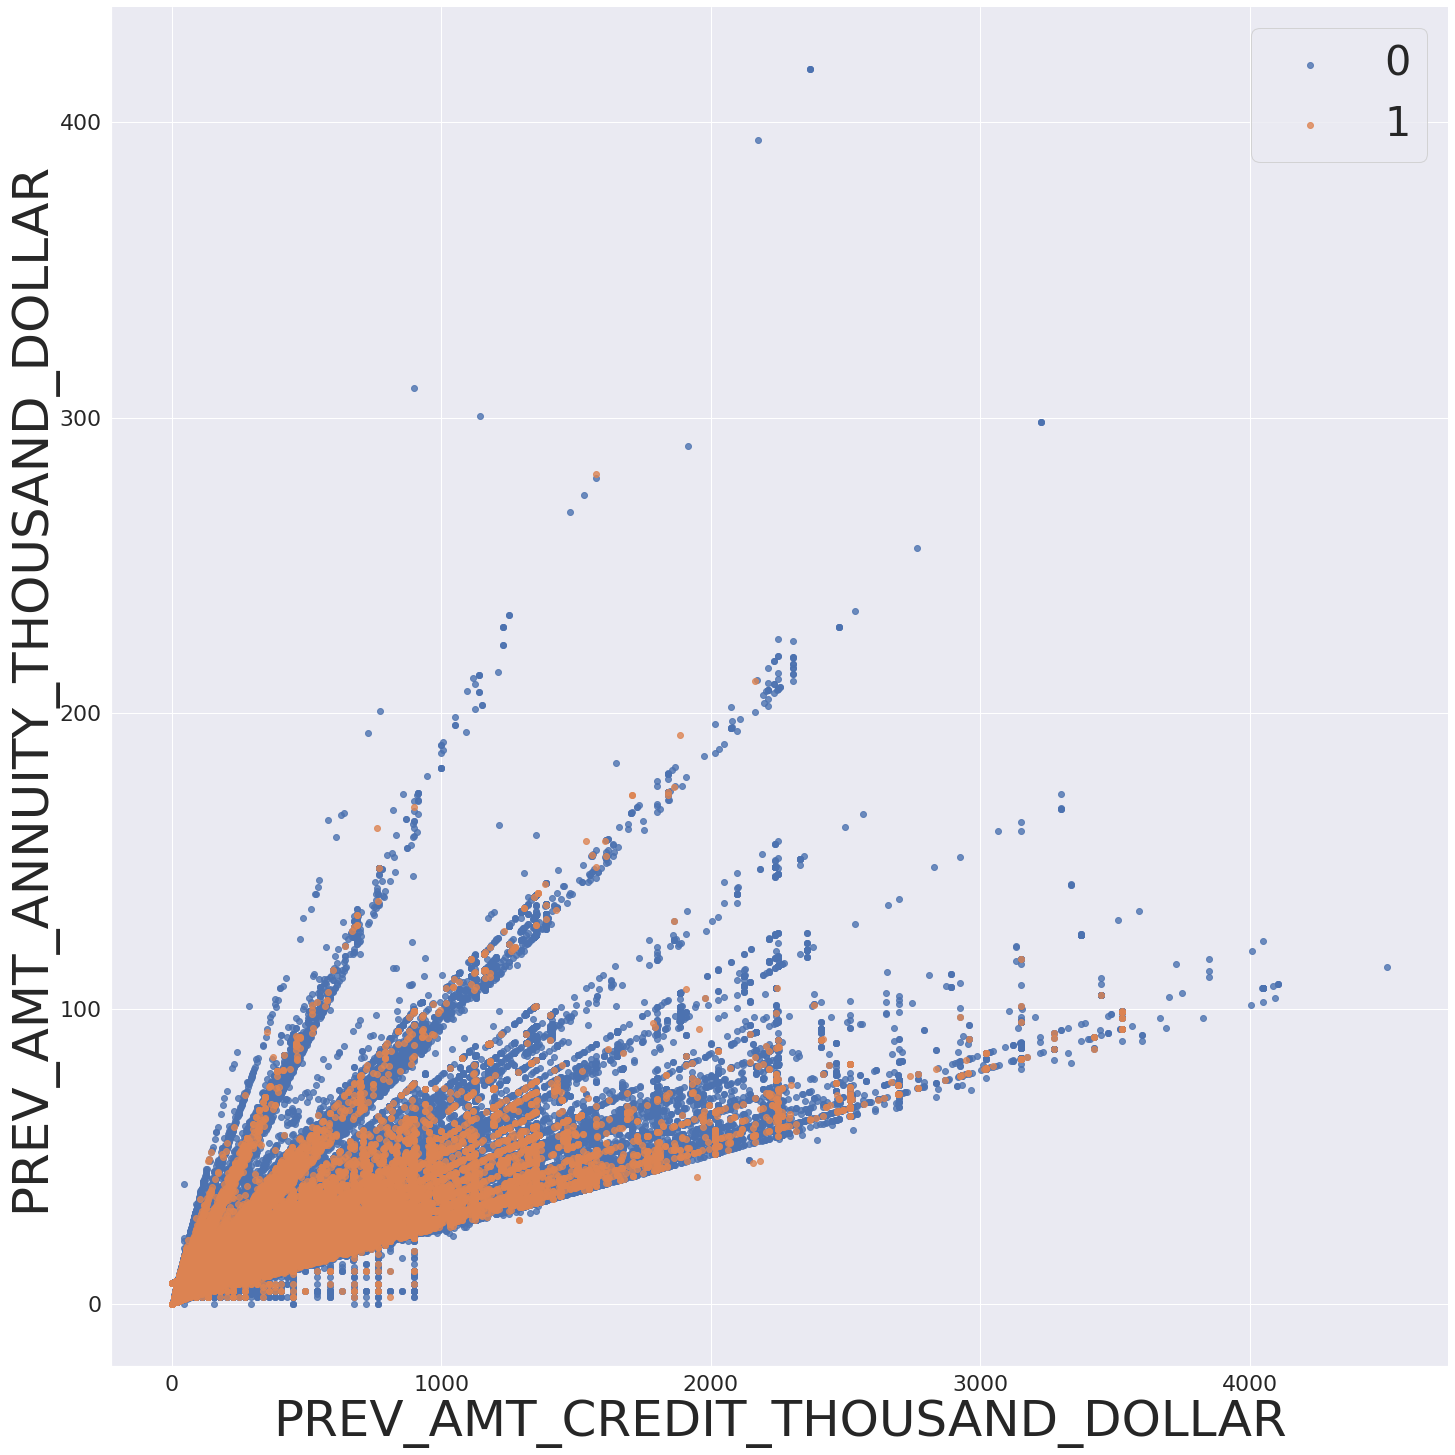

In [143]:
sns.set(font_scale = 2)

ax = sns.lmplot(x="PREV_AMT_CREDIT_THOUSAND_DOLLAR", y="PREV_AMT_ANNUITY_THOUSAND_DOLLAR", 
                data=merged_train_dataset, fit_reg=False, hue='TARGET', height=20, legend=False)
plt.legend(loc='upper right', fontsize = 'xx-large')

ax.set_xlabels("PREV_AMT_CREDIT_THOUSAND_DOLLAR",fontsize=50)
ax.set_ylabels("PREV_AMT_ANNUITY_THOUSAND_DOLLAR",fontsize=50)

plt.show()

Pretty much what I want

### Remove missing value column-wise

On another thought, I will get rid of OCCUPATION_TYPE and PRODUCT_COMBINATION	

In [144]:
merged_train_dataset = merged_train_dataset.drop(columns=['OCCUPATION_TYPE', 'PRODUCT_COMBINATION'])

In [187]:
merged_test_dataset = merged_test_dataset.drop(columns=['OCCUPATION_TYPE', 'PRODUCT_COMBINATION'])

### NAME_TYPE_SUITE

In [145]:
merged_train_dataset.NAME_TYPE_SUITE.value_counts()

Unaccompanied      1152731
Family             184076 
Spouse, partner    46627  
Children           13899  
Other_B            6723   
Other_A            3013   
Group of people    1223   
Name: NAME_TYPE_SUITE, dtype: int64

_Since the distribution of this features is heavily toward Unaccompanied, plus we are not given the information of what Other A|B are, I have decied to skip this feature_

In [146]:
merged_train_dataset = merged_train_dataset.drop(columns=['NAME_TYPE_SUITE'])

In [188]:
merged_test_dataset = merged_test_dataset.drop(columns=['NAME_TYPE_SUITE'])

In [189]:
mv_df = missing_value(merged_test_dataset)
mv_df

,Columns,Missing values,Percentage
0,SK_ID_CURR,0,0.000000
1,NAME_CONTRACT_TYPE_x,0,0.000000
2,CODE_GENDER,0,0.000000
3,FLAG_OWN_CAR,0,0.000000
4,FLAG_OWN_REALTY,0,0.000000
5,CNT_CHILDREN,0,0.000000
6,AMT_INCOME_TOTAL_THOUSAND_DOLLAR,0,0.000000
7,AMT_CREDIT_THOUSAND_DOLLAR,0,0.000000
8,AMT_ANNUITY_THOUSAND_DOLLAR,0,0.000000
9,AMT_GOODS_PRICE_THOUSAND_DOLLAR,0,0.000000


### Deal with MNAR (Missing not at random)

But this time, we are not going to get rid of data points. Instead, we will use **Imputer** to fill in the missing value

In [150]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(merged_train_dataset.iloc[:, 40:45])
merged_train_dataset.iloc[:, 40:45] = imputer.transform(merged_train_dataset.iloc[:, 40:45])

imputer = SimpleImputer(strategy="median")
imputer.fit(merged_train_dataset.iloc[:, 67:72])
merged_train_dataset.iloc[:, 67:72] = imputer.transform(merged_train_dataset.iloc[:, 67:72])

mv_df = missing_value(merged_train_dataset)
mv_df

,Columns,Missing values,Percentage
0,SK_ID_CURR,0,0.000000
1,TARGET,0,0.000000
2,NAME_CONTRACT_TYPE_x,0,0.000000
3,CODE_GENDER,0,0.000000
4,FLAG_OWN_CAR,0,0.000000
5,FLAG_OWN_REALTY,0,0.000000
6,CNT_CHILDREN,0,0.000000
7,AMT_INCOME_TOTAL_THOUSAND_DOLLAR,0,0.000000
8,AMT_CREDIT_THOUSAND_DOLLAR,0,0.000000
9,AMT_ANNUITY_THOUSAND_DOLLAR,0,0.000000


In [151]:
imputer = SimpleImputer(strategy="median")
imputer.fit(merged_train_dataset.iloc[:, 38:39])
merged_train_dataset.iloc[:, 38:39] = imputer.transform(merged_train_dataset.iloc[:, 38:39])

imputer = SimpleImputer(strategy="median")
imputer.fit(merged_train_dataset.iloc[:, 65:66])
merged_train_dataset.iloc[:, 65:66] = imputer.transform(merged_train_dataset.iloc[:, 65:66])

mv_df = missing_value(merged_train_dataset)
mv_df

,Columns,Missing values,Percentage
0,SK_ID_CURR,0,0.000000
1,TARGET,0,0.000000
2,NAME_CONTRACT_TYPE_x,0,0.000000
3,CODE_GENDER,0,0.000000
4,FLAG_OWN_CAR,0,0.000000
5,FLAG_OWN_REALTY,0,0.000000
6,CNT_CHILDREN,0,0.000000
7,AMT_INCOME_TOTAL_THOUSAND_DOLLAR,0,0.000000
8,AMT_CREDIT_THOUSAND_DOLLAR,0,0.000000
9,AMT_ANNUITY_THOUSAND_DOLLAR,0,0.000000


In [154]:
imputer = SimpleImputer(strategy="median")
imputer.fit(merged_train_dataset.iloc[:, 39:40])
merged_train_dataset.iloc[:, 39:40] = imputer.transform(merged_train_dataset.iloc[:, 39:40])

imputer = SimpleImputer(strategy="median")
imputer.fit(merged_train_dataset.iloc[:, 66:67])
merged_train_dataset.iloc[:, 66:67] = imputer.transform(merged_train_dataset.iloc[:, 66:67])

mv_df = missing_value(merged_train_dataset)
mv_df

,Columns,Missing values,Percentage
0,SK_ID_CURR,0,0.0
1,TARGET,0,0.0
2,NAME_CONTRACT_TYPE_x,0,0.0
3,CODE_GENDER,0,0.0
4,FLAG_OWN_CAR,0,0.0
5,FLAG_OWN_REALTY,0,0.0
6,CNT_CHILDREN,0,0.0
7,AMT_INCOME_TOTAL_THOUSAND_DOLLAR,0,0.0
8,AMT_CREDIT_THOUSAND_DOLLAR,0,0.0
9,AMT_ANNUITY_THOUSAND_DOLLAR,0,0.0


_For Test Dataset_

In [190]:
imputer = SimpleImputer(strategy="median")
imputer.fit(merged_test_dataset.iloc[:, 37:42])
merged_test_dataset.iloc[:, 37:42] = imputer.transform(merged_test_dataset.iloc[:, 37:42])

imputer = SimpleImputer(strategy="median")
imputer.fit(merged_test_dataset.iloc[:, 64:69])
merged_test_dataset.iloc[:, 64:69] = imputer.transform(merged_test_dataset.iloc[:, 64:69])

mv_df = missing_value(merged_test_dataset)
mv_df

,Columns,Missing values,Percentage
0,SK_ID_CURR,0,0.000000
1,NAME_CONTRACT_TYPE_x,0,0.000000
2,CODE_GENDER,0,0.000000
3,FLAG_OWN_CAR,0,0.000000
4,FLAG_OWN_REALTY,0,0.000000
5,CNT_CHILDREN,0,0.000000
6,AMT_INCOME_TOTAL_THOUSAND_DOLLAR,0,0.000000
7,AMT_CREDIT_THOUSAND_DOLLAR,0,0.000000
8,AMT_ANNUITY_THOUSAND_DOLLAR,0,0.000000
9,AMT_GOODS_PRICE_THOUSAND_DOLLAR,0,0.000000


In [191]:
imputer = SimpleImputer(strategy="median")
imputer.fit(merged_test_dataset.iloc[:, 42:43])
merged_test_dataset.iloc[:, 42:43] = imputer.transform(merged_test_dataset.iloc[:, 42:43])

imputer = SimpleImputer(strategy="median")
imputer.fit(merged_test_dataset.iloc[:, 69:70])
merged_test_dataset.iloc[:, 69:70] = imputer.transform(merged_test_dataset.iloc[:, 69:70])

mv_df = missing_value(merged_test_dataset)
mv_df

,Columns,Missing values,Percentage
0,SK_ID_CURR,0,0.0
1,NAME_CONTRACT_TYPE_x,0,0.0
2,CODE_GENDER,0,0.0
3,FLAG_OWN_CAR,0,0.0
4,FLAG_OWN_REALTY,0,0.0
5,CNT_CHILDREN,0,0.0
6,AMT_INCOME_TOTAL_THOUSAND_DOLLAR,0,0.0
7,AMT_CREDIT_THOUSAND_DOLLAR,0,0.0
8,AMT_ANNUITY_THOUSAND_DOLLAR,0,0.0
9,AMT_GOODS_PRICE_THOUSAND_DOLLAR,0,0.0


### Deal with special kind of missing value

Some features hind their missing values with XNA values. We have to dig deep

In [157]:
print(merged_train_dataset.shape)
merged_train_dataset.head(10)

(1411816, 94)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL_THOUSAND_DOLLAR,AMT_CREDIT_THOUSAND_DOLLAR,AMT_ANNUITY_THOUSAND_DOLLAR,AMT_GOODS_PRICE_THOUSAND_DOLLAR,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEAR_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,PREV_AMT_ANNUITY_THOUSAND_DOLLAR,PREV_AMT_APPLICATION_THOUSAND_DOLLAR,PREV_AMT_CREDIT_THOUSAND_DOLLAR,PREV_AMT_GOODS_PRICE_THOUSAND_DOLLAR,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,100002,1,0,M,N,Y,0,202.5,406.5975,24.7005,351.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.902806,1.744011,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1038818.0,Consumer loans,9.251775,179.0550,179.0550,179.055000,SATURDAY,9.0,Y,1.0,XAP,Approved,-606.0,XNA,XAP,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,low_normal
1,100003,0,0,F,N,N,0,270.0,1293.5025,35.6985,1129.5,State servant,Higher education,Married,House / apartment,0.003541,45.900068,3.252567,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510090,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1810518.0,Cash loans,98.356995,900.0000,1035.8820,900.000000,FRIDAY,12.0,Y,1.0,XNA,Approved,-746.0,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,low_normal
2,100003,0,0,F,N,N,0,270.0,1293.5025,35.6985,1129.5,State servant,Higher education,Married,House / apartment,0.003541,45.900068,3.252567,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510090,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2636178.0,Consumer loans,64.567665,337.5000,348.6375,337.500000,SUNDAY,17.0,Y,1.0,XAP,Approved,-828.0,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,middle
3,100003,0,0,F,N,N,0,270.0,1293.5025,35.6985,1129.5,State servant,Higher education,Married,House / apartment,0.003541,45.900068,3.252567,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510090,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2396755.0,Consumer loans,6.737310,68.8095,68.0535,68.809500,SATURDAY,15.0,Y,1.0,XAP,Approved,-2341.0,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,middle
4,100004,0,1,M,Y,Y,0,67.5,135.0000,6.7500,135.0,Working,Secondary / secondary special,Single / not married,House

#### NAME_CASH_LOAN_PURPOSE

In [160]:
# this will be the list of columns that will be dropped after this process
drop_cols = []

In [158]:
merged_train_dataset.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 785919
XNA                                 566605
Repairs                             20068 
Other                               13396 
Urgent needs                        7232  
Buying a used car                   2465  
Building a house or an annex        2340  
Everyday expenses                   2048  
Medicine                            1870  
Payments on other loans             1566  
Education                           1334  
Journey                             1040  
Purchase of electronic equipment    934   
Buying a new car                    885   
Wedding / gift / holiday            801   
Buying a home                       700   
Car repairs                         691   
Furniture                           658   
Buying a holiday home / land        463   
Business development                353   
Gasification / water supply         251   
Buying a garage                     116   
Hobby                               45    
Money for a

1. We are not provided with the meaning of XAP, which accounts for almost half
2. XNA, which is missing value, accounts for 550,000k
3. Takes too much time to process this columns

--> Drop this columns

In [161]:
drop_cols.append('NAME_CASH_LOAN_PURPOSE')

#### NAME_PAYMENT_TYPE

In [162]:
merged_train_dataset.NAME_PAYMENT_TYPE.value_counts()

Cash through the bank                        881464
XNA                                          522327
Non-cash from your account                   7085  
Cashless from the account of the employer    940   
Name: NAME_PAYMENT_TYPE, dtype: int64

#### NAME_GOODS_CATEGORY

In [163]:
merged_train_dataset.NAME_GOODS_CATEGORY.value_counts()

XNA                         796121
Mobile                      193518
Consumer Electronics        104677
Computers                   89798 
Audio/Video                 85366 
Furniture                   45357 
Photo / Cinema Equipment    21682 
Construction Materials      21347 
Clothing and Accessories    19551 
Auto Accessories            6218  
Jewelry                     5181  
Homewares                   4302  
Medical Supplies            3236  
Vehicles                    2849  
Sport and Leisure           2535  
Other                       2336  
Gardening                   2322  
Office Appliances           1982  
Tourism                     1323  
Medicine                    1298  
Direct Sales                330   
Fitness                     165   
Additional Service          109   
Education                   89    
Weapon                      65    
Insurance                   58    
Animals                     1     
Name: NAME_GOODS_CATEGORY, dtype: int64

In [169]:
drop_cols.append('NAME_GOODS_CATEGORY')

#### NAME_PORTFOLIO

In [164]:
merged_train_dataset.NAME_PORTFOLIO.value_counts()

POS      591692
Cash     391061
XNA      306865
Cards    121820
Cars     378   
Name: NAME_PORTFOLIO, dtype: int64

#### NAME_PRODUCT_TYPE

Was the previous application x-sell o walk-in

In [165]:
merged_train_dataset.NAME_PRODUCT_TYPE.value_counts()

XNA        898935
x-sell     384865
walk-in    128016
Name: NAME_PRODUCT_TYPE, dtype: int64

In [170]:
drop_cols.append('NAME_PRODUCT_TYPE')

#### SELLERPLACE_AREA

Selling area of seller place of the previous application

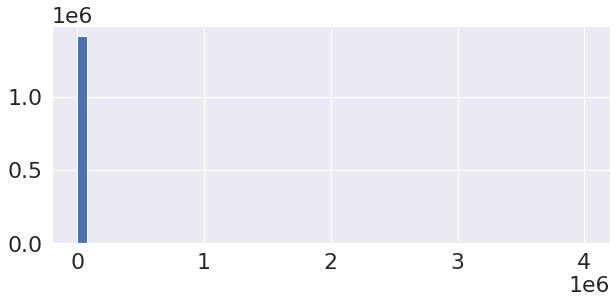

In [167]:
merged_train_dataset['SELLERPLACE_AREA'].hist(bins=50, figsize=(10,4))
plt.show()

In [171]:
drop_cols.append('SELLERPLACE_AREA')

#### NAME_SELLER_INDUSTRY

The industry of the seller

In [168]:
merged_train_dataset.NAME_SELLER_INDUSTRY.value_counts()

XNA                     714322
Consumer electronics    341261
Connectivity            238080
Furniture               48884 
Construction            25406 
Clothing                19858 
Industry                16537 
Auto technology         4069  
Jewelry                 2105  
MLM partners            921   
Tourism                 373   
Name: NAME_SELLER_INDUSTRY, dtype: int64

In [172]:
drop_cols.append('NAME_SELLER_INDUSTRY')

#### NAME_YIELD_GROUP

Grouped interest rate into small medium and high of the previous application

In [173]:
merged_train_dataset.NAME_YIELD_GROUP.value_counts()

XNA           428685
middle        324521
high          305713
low_normal    274462
low_action    78435 
Name: NAME_YIELD_GROUP, dtype: int64

**drop some columns**

In [174]:
drop_cols

['NAME_CASH_LOAN_PURPOSE',
 'NAME_GOODS_CATEGORY',
 'NAME_PRODUCT_TYPE',
 'SELLERPLACE_AREA',
 'NAME_SELLER_INDUSTRY']

In [175]:
merged_train_dataset = merged_train_dataset.drop(columns=drop_cols)

In [192]:
merged_test_dataset = merged_test_dataset.drop(columns=drop_cols)

In [193]:
print(merged_test_dataset.shape)

(256513, 88)


In [177]:
print(merged_train_dataset.shape)
merged_train_dataset.head(10)

(1411816, 89)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL_THOUSAND_DOLLAR,AMT_CREDIT_THOUSAND_DOLLAR,AMT_ANNUITY_THOUSAND_DOLLAR,AMT_GOODS_PRICE_THOUSAND_DOLLAR,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEAR_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,PREV_AMT_ANNUITY_THOUSAND_DOLLAR,PREV_AMT_APPLICATION_THOUSAND_DOLLAR,PREV_AMT_CREDIT_THOUSAND_DOLLAR,PREV_AMT_GOODS_PRICE_THOUSAND_DOLLAR,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,NAME_YIELD_GROUP
0,100002,1,0,M,N,Y,0,202.5,406.5975,24.7005,351.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.902806,1.744011,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1038818.0,Consumer loans,9.251775,179.0550,179.0550,179.055000,SATURDAY,9.0,Y,1.0,Approved,-606.0,XNA,XAP,New,POS,Stone,low_normal
1,100003,0,0,F,N,N,0,270.0,1293.5025,35.6985,1129.5,State servant,Higher education,Married,House / apartment,0.003541,45.900068,3.252567,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510090,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1810518.0,Cash loans,98.356995,900.0000,1035.8820,900.000000,FRIDAY,12.0,Y,1.0,Approved,-746.0,XNA,XAP,Repeater,Cash,Credit and cash offices,low_normal
2,100003,0,0,F,N,N,0,270.0,1293.5025,35.6985,1129.5,State servant,Higher education,Married,House / apartment,0.003541,45.900068,3.252567,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510090,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2636178.0,Consumer loans,64.567665,337.5000,348.6375,337.500000,SUNDAY,17.0,Y,1.0,Approved,-828.0,Cash through the bank,XAP,Refreshed,POS,Stone,middle
3,100003,0,0,F,N,N,0,270.0,1293.5025,35.6985,1129.5,State servant,Higher education,Married,House / apartment,0.003541,45.900068,3.252567,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510090,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2396755.0,Consumer loans,6.737310,68.8095,68.0535,68.809500,SATURDAY,15.0,Y,1.0,Approved,-2341.0,Cash through the bank,XAP,Refreshed,POS,Country-wide,middle
4,100004,0,1,M,Y,Y,0,67.5,135.0000,6.7500,135.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.145106,0.616016,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1564014.0,Consumer loans,5.357250,24.2820

# --------------------------------------Feature Engineering------------------------------------------

# Categorical Variable Encoding

Turn out, there are so many different ways to encode categorical variables. Other than the obvious One Hot Encoding, we also have: 

2. Label Encoding
3. Ordinal Encoding
4. Helmert Encoding
5. Binary Encoding
6. Frequency Encoding
7. Mean Encoding
8. Weight of Evidence Encoding
9. Probability Ratio Encoding
10. Hashing Encoding
11. Backward Difference Encoding
12. Leave One Out Encoding
13. James-Stein Encoding
14. M-estimator Encoding

For each algorithm, there are more preferred ways of encoding than the others. As a result, we will try out multiple ways of encoding for each algorithms for best result.

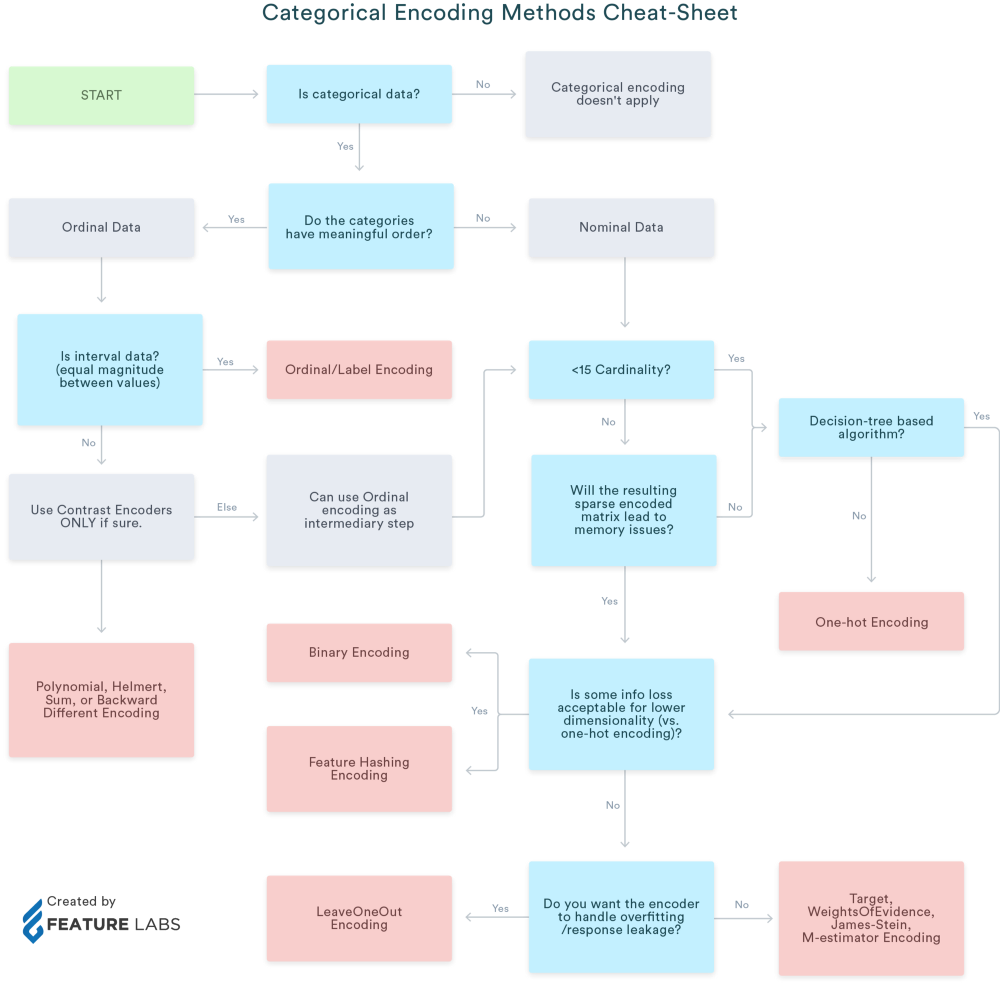

In [194]:
Image(filename='Pictures/Home Credit/encoding.png') 

In [211]:
# a function to make value_counts() easier
def value_counts(feature):
    print("Train")
    print(merged_train_dataset[feature].value_counts())
    print("\n")
    print("Test")
    print(merged_test_dataset[feature].value_counts())

## Binary Categorical Variable

Quite obvious

**CODE_GENDER**

In [196]:
print(merged_train_dataset.CODE_GENDER.value_counts())
print(merged_test_dataset.CODE_GENDER.value_counts())

F      954266
M      457495
XNA    55    
Name: CODE_GENDER, dtype: int64
F    176747
M    79766 
Name: CODE_GENDER, dtype: int64


In [197]:
# change CODE_GENDER to 1 for male and 0 for female and missing values
merged_train_dataset['CODE_GENDER'] = np.where(merged_train_dataset['CODE_GENDER'] == 'M', 1, 0) 
merged_test_dataset['CODE_GENDER'] = np.where(merged_test_dataset['CODE_GENDER'] == 'M', 1, 0) 

**Yes/No features:** 

CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, FLAG_LAST_APPL_PER_CONTRACT

In [198]:
for col in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_LAST_APPL_PER_CONTRACT']:
    merged_train_dataset[col] = np.where(merged_train_dataset[col] == 'Y', 1, 0) 
    merged_test_dataset[col] = np.where(merged_test_dataset[col] == 'Y', 1, 0)
    
merged_train_dataset.head(8)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL_THOUSAND_DOLLAR,AMT_CREDIT_THOUSAND_DOLLAR,AMT_ANNUITY_THOUSAND_DOLLAR,AMT_GOODS_PRICE_THOUSAND_DOLLAR,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEAR_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,PREV_AMT_ANNUITY_THOUSAND_DOLLAR,PREV_AMT_APPLICATION_THOUSAND_DOLLAR,PREV_AMT_CREDIT_THOUSAND_DOLLAR,PREV_AMT_GOODS_PRICE_THOUSAND_DOLLAR,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,NAME_YIELD_GROUP
0,100002,1,0,0,0,1,0,202.5,406.5975,24.7005,351.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.902806,1.744011,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1038818.0,Consumer loans,9.251775,179.0550,179.0550,179.055000,SATURDAY,9.0,1,1.0,Approved,-606.0,XNA,XAP,New,POS,Stone,low_normal
1,100003,0,0,0,0,0,0,270.0,1293.5025,35.6985,1129.5,State servant,Higher education,Married,House / apartment,0.003541,45.900068,3.252567,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510090,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1810518.0,Cash loans,98.356995,900.0000,1035.8820,900.000000,FRIDAY,12.0,1,1.0,Approved,-746.0,XNA,XAP,Repeater,Cash,Credit and cash offices,low_normal
2,100003,0,0,0,0,0,0,270.0,1293.5025,35.6985,1129.5,State servant,Higher education,Married,House / apartment,0.003541,45.900068,3.252567,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510090,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2636178.0,Consumer loans,64.567665,337.5000,348.6375,337.500000,SUNDAY,17.0,1,1.0,Approved,-828.0,Cash through the bank,XAP,Refreshed,POS,Stone,middle
3,100003,0,0,0,0,0,0,270.0,1293.5025,35.6985,1129.5,State servant,Higher education,Married,House / apartment,0.003541,45.900068,3.252567,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510090,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2396755.0,Consumer loans,6.737310,68.8095,68.0535,68.809500,SATURDAY,15.0,1,1.0,Approved,-2341.0,Cash through the bank,XAP,Refreshed,POS,Country-wide,middle
4,100004,0,1,0,1,1,0,67.5,135.0000,6.7500,135.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.145106,0.616016,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1564014.0,Consumer loans,5.357250,24.2820

**NAME_CONTRACT_TYPE_y**

In [199]:
merged_train_dataset['NAME_CONTRACT_TYPE_y'] = np.where(merged_train_dataset['NAME_CONTRACT_TYPE_y'] == 'Revolving loans', 1, 0) 
merged_test_dataset['NAME_CONTRACT_TYPE_y'] = np.where(merged_test_dataset['NAME_CONTRACT_TYPE_y'] == 'Revolving loans', 1, 0) 

**NAME_CONTRACT_STATUS**

Contract status (approved, cancelled, ...) of previous application

In [212]:
value_counts("NAME_CONTRACT_STATUS")

Train
Approved        884919
Canceled        259146
Refused         245001
Unused offer    22750 
Name: NAME_CONTRACT_STATUS, dtype: int64


Test
Approved        150682
Canceled        56878 
Refused         45288 
Unused offer    3665  
Name: NAME_CONTRACT_STATUS, dtype: int64


_Not a binary feature_

## High Cardinality Categorical Features

For all (or almost) of high cardinality categorical features, we will use **Weight of Evidence (WoE)** to do encoding. 

WoE tells the predictive power of an independent variable in relation to the dependent variable. Since it evolved from credit scoring world, it is generally described as a measure of the separation of good and bad customers. "Bad Customers" refers to the customers who defaulted on a loan. and "Good Customers" refers to the customers who paid back loan.

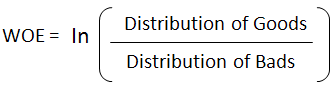

In [215]:
Image(filename='Pictures/Home Credit/woe.png') 

In [223]:
def woe_encoding(train_set, feature):
    # calculate probability pf target = 1 (Good)
    woe_df = train_set.groupby(feature)["TARGET"].mean()
    woe_df = pd.DataFrame(woe_df)
    # rename the column name to "Good" to keep it consistent with formula for wasy understanding 
    woe_df = woe_df.rename(columns={"TARGET":"Good"})
    # we need to add a small value to avoid divide by zero in denominator
    woe_df["Good"] = np.where(woe_df["Good"] == 0, 0.00000001, woe_df["Good"])
    # calculate Bad probability, which is 1 - Good
    woe_df["Bad"] = 1 - woe_df["Good"]
    # we need to add a small value to avoid divide by zero in denominator
    woe_df["Bad"] = np.where(woe_df["Bad"] == 0, 0.00000001, woe_df["Bad"])
    # compute the WoE
    woe_df["WoE"] = np.log(woe_df["Good"]/woe_df["Bad"])
    return woe_df

**NAME_INCOME_TYPE**

Clients income type (businessman, working, maternity leave,…)

In [213]:
value_counts("NAME_INCOME_TYPE")

Train
Working                 723367
Commercial associate    320504
Pensioner               273470
State servant           94312 
Unemployed              123   
Student                 24    
Maternity leave         16    
Name: NAME_INCOME_TYPE, dtype: int64


Test
Working                 124597
Commercial associate    60741 
Pensioner               53950 
State servant           17222 
Student                 3     
Name: NAME_INCOME_TYPE, dtype: int64


In [224]:
woe_df = woe_encoding(merged_train_dataset, "NAME_INCOME_TYPE")
woe_df

,Good,Bad,WoE
NAME_INCOME_TYPE,,,
Commercial associate,8.108167e-02,9.189183e-01,-2.427740
Maternity leave,1.000000e+00,1.000000e-08,18.420681
Pensioner,5.832815e-02,9.416718e-01,-2.781572
State servant,6.418059e-02,9.358194e-01,-2.679722
Student,1.000000e-08,1.000000e+00,-18.420681
Unemployed,5.447154e-01,4.552846e-01,0.179341
Working,1.024971e-01,8.975029e-01,-2.169782


In [225]:
# map the WoE values back to each row of merged_train_dataset
merged_train_dataset.loc[:, "NAME_INCOME_TYPE_WoE"] = merged_train_dataset["NAME_INCOME_TYPE"].map(woe_df["WoE"])
print(merged_train_dataset.shape)
merged_train_dataset.head()

(1411816, 90)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL_THOUSAND_DOLLAR,AMT_CREDIT_THOUSAND_DOLLAR,AMT_ANNUITY_THOUSAND_DOLLAR,AMT_GOODS_PRICE_THOUSAND_DOLLAR,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEAR_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,PREV_AMT_ANNUITY_THOUSAND_DOLLAR,PREV_AMT_APPLICATION_THOUSAND_DOLLAR,PREV_AMT_CREDIT_THOUSAND_DOLLAR,PREV_AMT_GOODS_PRICE_THOUSAND_DOLLAR,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,NAME_YIELD_GROUP,NAME_INCOME_TYPE_WoE
0,100002,1,0,0,0,1,0,202.5,406.5975,24.7005,351.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.902806,1.744011,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1038818.0,0,9.251775,179.0550,179.0550,179.0550,SATURDAY,9.0,1,1.0,Approved,-606.0,XNA,XAP,New,POS,Stone,low_normal,-2.169782
1,100003,0,0,0,0,0,0,270.0,1293.5025,35.6985,1129.5,State servant,Higher education,Married,House / apartment,0.003541,45.900068,3.252567,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510090,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1810518.0,0,98.356995,900.0000,1035.8820,900.0000,FRIDAY,12.0,1,1.0,Approved,-746.0,XNA,XAP,Repeater,Cash,Credit and cash offices,low_normal,-2.679722
2,100003,0,0,0,0,0,0,270.0,1293.5025,35.6985,1129.5,State servant,Higher education,Married,House / apartment,0.003541,45.900068,3.252567,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510090,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2636178.0,0,64.567665,337.5000,348.6375,337.5000,SUNDAY,17.0,1,1.0,Approved,-828.0,Cash through the bank,XAP,Refreshed,POS,Stone,middle,-2.679722
3,100003,0,0,0,0,0,0,270.0,1293.5025,35.6985,1129.5,State servant,Higher education,Married,House / apartment,0.003541,45.900068,3.252567,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510090,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2396755.0,0,6.737310,68.8095,68.0535,68.8095,SATURDAY,15.0,1,1.0,Approved,-2341.0,Cash through the bank,XAP,Refreshed,POS,Country-wide,middle,-2.679722
4,100004,0,1,0,1,1,0,67.5,135.0000,6.7500,135.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.145106,0.616016,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1564014.0,0,5.357250,24.2820,20.1060

I don't want the encoded column to be at the end so I will replace it with the NAME_INCOME_TYPE column

In [226]:
merged_train_dataset["NAME_INCOME_TYPE"] = merged_train_dataset["NAME_INCOME_TYPE_WoE"]
merged_train_dataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL_THOUSAND_DOLLAR,AMT_CREDIT_THOUSAND_DOLLAR,AMT_ANNUITY_THOUSAND_DOLLAR,AMT_GOODS_PRICE_THOUSAND_DOLLAR,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEAR_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,PREV_AMT_ANNUITY_THOUSAND_DOLLAR,PREV_AMT_APPLICATION_THOUSAND_DOLLAR,PREV_AMT_CREDIT_THOUSAND_DOLLAR,PREV_AMT_GOODS_PRICE_THOUSAND_DOLLAR,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,NAME_YIELD_GROUP,NAME_INCOME_TYPE_WoE
0,100002,1,0,0,0,1,0,202.5,406.5975,24.7005,351.0,-2.169782,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.902806,1.744011,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1038818.0,0,9.251775,179.0550,179.0550,179.0550,SATURDAY,9.0,1,1.0,Approved,-606.0,XNA,XAP,New,POS,Stone,low_normal,-2.169782
1,100003,0,0,0,0,0,0,270.0,1293.5025,35.6985,1129.5,-2.679722,Higher education,Married,House / apartment,0.003541,45.900068,3.252567,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510090,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1810518.0,0,98.356995,900.0000,1035.8820,900.0000,FRIDAY,12.0,1,1.0,Approved,-746.0,XNA,XAP,Repeater,Cash,Credit and cash offices,low_normal,-2.679722
2,100003,0,0,0,0,0,0,270.0,1293.5025,35.6985,1129.5,-2.679722,Higher education,Married,House / apartment,0.003541,45.900068,3.252567,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510090,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2636178.0,0,64.567665,337.5000,348.6375,337.5000,SUNDAY,17.0,1,1.0,Approved,-828.0,Cash through the bank,XAP,Refreshed,POS,Stone,middle,-2.679722
3,100003,0,0,0,0,0,0,270.0,1293.5025,35.6985,1129.5,-2.679722,Higher education,Married,House / apartment,0.003541,45.900068,3.252567,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510090,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2396755.0,0,6.737310,68.8095,68.0535,68.8095,SATURDAY,15.0,1,1.0,Approved,-2341.0,Cash through the bank,XAP,Refreshed,POS,Country-wide,middle,-2.679722
4,100004,0,1,0,1,1,0,67.5,135.0000,6.7500,135.0,-2.169782,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.145106,0.616016,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1564014.0,0,5.357250,24.2820,20.1060,24.2820

In [229]:
merged_train_dataset = merged_train_dataset.drop(columns=["NAME_INCOME_TYPE_WoE"])

In [231]:
# map the WoE values back to each row of merged_test_dataset
merged_test_dataset["NAME_INCOME_TYPE"] = merged_test_dataset["NAME_INCOME_TYPE"].map(woe_df["WoE"])
print(merged_test_dataset.shape)
merged_test_dataset.head()

(256513, 88)


,SK_ID_CURR,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL_THOUSAND_DOLLAR,AMT_CREDIT_THOUSAND_DOLLAR,AMT_ANNUITY_THOUSAND_DOLLAR,AMT_GOODS_PRICE_THOUSAND_DOLLAR,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEAR_BIRTH,YEAR_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,PREV_AMT_ANNUITY_THOUSAND_DOLLAR,PREV_AMT_APPLICATION_THOUSAND_DOLLAR,PREV_AMT_CREDIT_THOUSAND_DOLLAR,PREV_AMT_GOODS_PRICE_THOUSAND_DOLLAR,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,NAME_YIELD_GROUP
0,100001,0,0,0,1,0,135.0,568.800,20.5605,450.0,-2.169782,Higher education,Married,House / apartment,0.018850,52.678987,6.376454,-5170.0,-812,1,1,0,1,0,1,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.789654,0.159520,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1369693.0,0,3.951000,24.8355,23.7870,24.835500,FRIDAY,13.0,1,1.0,Approved,-1740.0,Cash through the bank,XAP,Refreshed,POS,Country-wide,high
1,100005,0,0,0,1,0,99.0,222.768,17.3700,180.0,-2.169782,Secondary / secondary special,Married,House / apartment,0.035792,49.456537,12.235455,-9118.0,-1623,1,1,0,1,0,0,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.291656,0.432962,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,1857999.0,0,7.094000,0.0000,0.0000,74.850937,FRIDAY,10.0,1,1.0,Canceled,-315.0,XNA,XAP,Repeater,XNA,Credit and cash offices,XNA
2,100005,0,0,0,1,0,99.0,222.768,17.3700,180.0,-2.169782,Secondary / secondary special,Married,House / apartment,0.035792,49.456537,12.235455,-9118.0,-1623,1,1,0,1,0,0,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.291656,0.432962,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,2495675.0,0,4.813200,44.6175,40.1535,44.617500,THURSDAY,11.0,1,1.0,Approved,-757.0,Cash through the bank,XAP,New,POS,Country-wide,high
3,100013,0,0,1,1,0,202.5,663.264,69.7770,630.0,-2.169782,Higher education,Married,House / apartment,0.019101,54.861054,12.205339,-2175.0,-3503,1,1,0,1,0,0,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,0.699787,0.610991,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0,1865796.0,0,6.538185,51.0300,47.9340,51.030000,THURSDAY,12.0,1,1.0,Approved,-1999.0,Cash through the bank,XAP,Repeater,POS,Stone,high
4,100013,0,0,1,1,0,202.5,663.264,69.7770,630.0,-2.169782,Higher education,Married,House / apartment,0.019101,54.861054,12.205339,-2175.0,-3503,1,1,0,1,0,0,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,0.699787,0.610991,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0,1222069.0,0,7.094000,0.0000,0.0000,74.850937,WEDNESDAY,16.0,1,1.0,Canceled,-222.0,XNA,XAP,Repeater,XNA,Credit and cash offices,XNA


**Ok so it seems to work just fine. Let's create a loop to do WoE encoding for all the features that we choose.**

In [233]:
woe_cols = []

**NAME_EDUCATION_TYPE**

In [234]:
value_counts("NAME_EDUCATION_TYPE")

Train
Secondary / secondary special    1037293
Higher education                 311685 
Incomplete higher                45142  
Lower secondary                  17134  
Academic degree                  562    
Name: NAME_EDUCATION_TYPE, dtype: int64


Test
Secondary / secondary special    184469
Higher education                 61180 
Incomplete higher                8381  
Lower secondary                  2298  
Academic degree                  185   
Name: NAME_EDUCATION_TYPE, dtype: int64


In [235]:
woe_cols.append("NAME_EDUCATION_TYPE")

**NAME_FAMILY_STATUS**

In [236]:
value_counts("NAME_FAMILY_STATUS")

Train
Married                 909695
Single / not married    186402
Civil marriage          142944
Separated               91191 
Widow                   81584 
Name: NAME_FAMILY_STATUS, dtype: int64


Test
Married                 172088
Single / not married    33088 
Civil marriage          22978 
Separated               15070 
Widow                   13289 
Name: NAME_FAMILY_STATUS, dtype: int64


In [237]:
woe_cols.append("NAME_FAMILY_STATUS")

**NAME_HOUSING_TYPE**

What is the housing situation of the client (renting, living with parents, ...)

In [238]:
value_counts("NAME_HOUSING_TYPE")

Train
House / apartment      1263253
With parents           61532  
Municipal apartment    51482  
Rented apartment       19772  
Office apartment       11389  
Co-op apartment        4388   
Name: NAME_HOUSING_TYPE, dtype: int64


Test
House / apartment      232251
With parents           10686 
Municipal apartment    7957  
Rented apartment       3223  
Office apartment       1847  
Co-op apartment        549   
Name: NAME_HOUSING_TYPE, dtype: int64


In [239]:
woe_cols.append("NAME_HOUSING_TYPE")

**WEEKDAY_APPR_PROCESS_START_x**

In [240]:
value_counts("WEEKDAY_APPR_PROCESS_START_x")

Train
TUESDAY      248219
WEDNESDAY    235939
MONDAY       234172
THURSDAY     229996
FRIDAY       229903
SATURDAY     157002
SUNDAY       76585 
Name: WEEKDAY_APPR_PROCESS_START_x, dtype: int64


Test
TUESDAY      50914
MONDAY       45459
THURSDAY     43852
WEDNESDAY    43562
FRIDAY       37768
SATURDAY     24963
SUNDAY       9995 
Name: WEEKDAY_APPR_PROCESS_START_x, dtype: int64


_To be completely honest, I just do not think this feature plays a huge role in determining the target value. The distribution is spread evenly among all days, with an exception of Sunday. I will just get rid of this feature._

In [241]:
merged_train_dataset = merged_train_dataset.drop(columns=["WEEKDAY_APPR_PROCESS_START_x",
                                                          "WEEKDAY_APPR_PROCESS_START_y"])

merged_test_dataset = merged_test_dataset.drop(columns=["WEEKDAY_APPR_PROCESS_START_x",
                                                        "WEEKDAY_APPR_PROCESS_START_y"])

**ORGANIZATION_TYPE**

Type of organization where client works

In [242]:
value_counts("ORGANIZATION_TYPE")

Train
Business Entity Type 3    304153
XNA                       273509
Self-employed             182887
Other                     73422 
Medicine                  52009 
Business Entity Type 2    46346 
Government                45729 
School                    38970 
Trade: type 7             37208 
Kindergarten              31348 
Construction              29667 
Business Entity Type 1    25428 
Transport: type 4         24563 
Security                  15600 
Industry: type 3          15233 
Industry: type 9          14671 
Housing                   13696 
Trade: type 3             13649 
Industry: type 11         12109 
Military                  11561 
Trade: type 2             11095 
Agriculture               10785 
Bank                      10631 
Police                    10333 
Postal                    10045 
Transport: type 2         9171  
Security Ministries       8409  
Restaurant                8242  
Services                  7016  
Industry: type 7          6118  
Univ

We will assume XNA values are observations that are not willing to share information about their organization type

In [243]:
woe_cols.append("ORGANIZATION_TYPE")

**NAME_CONTRACT_STATUS**

Contract status (approved, cancelled, ...) of previous application

In [244]:
value_counts("NAME_CONTRACT_STATUS")

Train
Approved        884919
Canceled        259146
Refused         245001
Unused offer    22750 
Name: NAME_CONTRACT_STATUS, dtype: int64


Test
Approved        150682
Canceled        56878 
Refused         45288 
Unused offer    3665  
Name: NAME_CONTRACT_STATUS, dtype: int64


In [245]:
woe_cols.append("NAME_CONTRACT_STATUS")

**NAME_PAYMENT_TYPE**

Payment method that client chose to pay for the previous application

In [246]:
value_counts("NAME_PAYMENT_TYPE")

Train
Cash through the bank                        881464
XNA                                          522327
Non-cash from your account                   7085  
Cashless from the account of the employer    940   
Name: NAME_PAYMENT_TYPE, dtype: int64


Test
Cash through the bank                        150852
XNA                                          104424
Non-cash from your account                   1093  
Cashless from the account of the employer    144   
Name: NAME_PAYMENT_TYPE, dtype: int64


In [247]:
merged_train_dataset['NAME_PAYMENT_TYPE'] = np.where(merged_train_dataset['NAME_PAYMENT_TYPE'] == 'XNA', "Cash through the bank", merged_train_dataset['NAME_PAYMENT_TYPE'])

merged_test_dataset['NAME_PAYMENT_TYPE'] = np.where(merged_test_dataset['NAME_PAYMENT_TYPE'] == 'XNA', "Cash through the bank", merged_test_dataset['NAME_PAYMENT_TYPE'])

value_counts("NAME_PAYMENT_TYPE")

Train
Cash through the bank                        1403791
Non-cash from your account                   7085   
Cashless from the account of the employer    940    
Name: NAME_PAYMENT_TYPE, dtype: int64


Test
Cash through the bank                        255276
Non-cash from your account                   1093  
Cashless from the account of the employer    144   
Name: NAME_PAYMENT_TYPE, dtype: int64


In [248]:
woe_cols.append("NAME_PAYMENT_TYPE")

**CODE_REJECT_REASON**

Why was the previous application rejected

In [249]:
value_counts("CODE_REJECT_REASON")

Train
XAP       1144058
HC        145777 
LIMIT     47669  
SCO       32589  
CLIENT    22750  
SCOFR     10869  
XNA       4368   
VERIF     3065   
SYSTEM    671    
Name: CODE_REJECT_REASON, dtype: int64


Test
XAP       207560
HC        29247 
LIMIT     7907  
SCO       4831  
CLIENT    3665  
SCOFR     1936  
XNA       866   
VERIF     456   
SYSTEM    45    
Name: CODE_REJECT_REASON, dtype: int64


In [250]:
merged_train_dataset = merged_train_dataset.drop(columns=["CODE_REJECT_REASON"])

merged_test_dataset = merged_test_dataset.drop(columns=["CODE_REJECT_REASON"])

**NAME_CLIENT_TYPE**

Was the client old or new client when applying for the previous application

In [251]:
value_counts("NAME_CLIENT_TYPE")

Train
Repeater     1036332
New          259185 
Refreshed    114759 
XNA          1540   
Name: NAME_CLIENT_TYPE, dtype: int64


Test
Repeater     193579
New          41823 
Refreshed    20713 
XNA          398   
Name: NAME_CLIENT_TYPE, dtype: int64


In [252]:
merged_train_dataset['NAME_CLIENT_TYPE'] = np.where(merged_train_dataset['NAME_CLIENT_TYPE'] == 'XNA', "Repeater", merged_train_dataset['NAME_CLIENT_TYPE'])

merged_test_dataset['NAME_CLIENT_TYPE'] = np.where(merged_test_dataset['NAME_CLIENT_TYPE'] == 'XNA', "Repeater", merged_test_dataset['NAME_CLIENT_TYPE'])

value_counts("NAME_PAYMENT_TYPE")

Train
Cash through the bank                        1403791
Non-cash from your account                   7085   
Cashless from the account of the employer    940    
Name: NAME_PAYMENT_TYPE, dtype: int64


Test
Cash through the bank                        255276
Non-cash from your account                   1093  
Cashless from the account of the employer    144   
Name: NAME_PAYMENT_TYPE, dtype: int64


In [253]:
woe_cols.append("NAME_CLIENT_TYPE")

**NAME_PORTFOLIO**

Was the previous application for CASH, POS, CAR, …

In [254]:
value_counts("NAME_PORTFOLIO")

Train
POS      591692
Cash     391061
XNA      306865
Cards    121820
Cars     378   
Name: NAME_PORTFOLIO, dtype: int64


Test
POS      98551
Cash     69900
XNA      65017
Cards    23000
Cars     45   
Name: NAME_PORTFOLIO, dtype: int64


In [258]:
woe_cols.append("NAME_PORTFOLIO")

**CHANNEL_TYPE**

Through which channel we acquired the client on the previous application

In [259]:
value_counts("CHANNEL_TYPE")

Train
Credit and cash offices       599511
Country-wide                  422468
Stone                         183327
Regional / Local              92362 
Contact center                58807 
AP+ (Cash loan)               49570 
Channel of corporate sales    5367  
Car dealer                    404   
Name: CHANNEL_TYPE, dtype: int64


Test
Credit and cash offices       119626
Country-wide                  71628 
Stone                         28575 
Regional / Local              16056 
Contact center                12406 
AP+ (Cash loan)               7422  
Channel of corporate sales    754   
Car dealer                    46    
Name: CHANNEL_TYPE, dtype: int64


In [260]:
woe_cols.append("CHANNEL_TYPE")

**NAME_YIELD_GROUP**

Grouped interest rate into small medium and high of the previous application

In [261]:
value_counts("NAME_YIELD_GROUP")

Train
XNA           428685
middle        324521
high          305713
low_normal    274462
low_action    78435 
Name: NAME_YIELD_GROUP, dtype: int64


Test
XNA           88017
middle        60561
high          47270
low_normal    47211
low_action    13454
Name: NAME_YIELD_GROUP, dtype: int64


In [262]:
merged_train_dataset = merged_train_dataset.drop(columns=["NAME_YIELD_GROUP"])

merged_test_dataset = merged_test_dataset.drop(columns=["NAME_YIELD_GROUP"])

**Let's do WoE on all the columns**

In [263]:
woe_cols

['NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'ORGANIZATION_TYPE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'NAME_CLIENT_TYPE',
 'NAME_PORTFOLIO',
 'CHANNEL_TYPE']

In [264]:
for col in woe_cols: 
    woe_df = woe_encoding(merged_train_dataset, col)
    # map the WoE values back to each row of merged_train_dataset
    merged_train_dataset[col] = merged_train_dataset[col].map(woe_df["WoE"])
    # map the WoE values back to each row of merged_test_dataset
    merged_test_dataset[col] = merged_test_dataset[col].map(woe_df["WoE"])

In [265]:
print(merged_train_dataset.shape)
print(merged_test_dataset.shape)

(1411816, 85)
(256513, 84)


In [266]:
merged_train_dataset.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL_THOUSAND_DOLLAR,AMT_CREDIT_THOUSAND_DOLLAR,AMT_ANNUITY_THOUSAND_DOLLAR,AMT_GOODS_PRICE_THOUSAND_DOLLAR,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,AGE,YEAR_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,PREV_AMT_ANNUITY_THOUSAND_DOLLAR,PREV_AMT_APPLICATION_THOUSAND_DOLLAR,PREV_AMT_CREDIT_THOUSAND_DOLLAR,PREV_AMT_GOODS_PRICE_THOUSAND_DOLLAR,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE
0,100002,1,0,0,0,1,0,202.5,406.5975,24.7005,351.0,-2.169782,-2.266781,-2.179245,-2.392148,0.018801,25.902806,1.744011,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,-2.200784,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1038818.0,0,9.251775,179.0550,179.0550,179.055000,9.0,1,1.0,-2.499409,-606.0,-2.35594,-2.314137,-2.492686,-2.531611
1,100003,0,0,0,0,0,0,270.0,1293.5025,35.6985,1129.5,-2.679722,-2.742137,-2.396341,-2.392148,0.003541,45.900068,3.252567,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,-2.628793,0.622246,0.510090,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1810518.0,0,98.356995,900.0000,1035.8820,900.000000,12.0,1,1.0,-2.499409,-746.0,-2.35594,-2.348524,-2.328857,-2.312230
2,100003,0,0,0,0,0,0,270.0,1293.5025,35.6985,1129.5,-2.679722,-2.742137,-2.396341,-2.392148,0.003541,45.900068,3.252567,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,-2.628793,0.622246,0.510090,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2636178.0,0,64.567665,337.5000,348.6375,337.500000,17.0,1,1.0,-2.499409,-828.0,-2.35594,-2.536535,-2.492686,-2.531611
3,100003,0,0,0,0,0,0,270.0,1293.5025,35.6985,1129.5,-2.679722,-2.742137,-2.396341,-2.392148,0.003541,45.900068,3.252567,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,-2.628793,0.622246,0.510090,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2396755.0,0,6.737310,68.8095,68.0535,68.809500,15.0,1,1.0,-2.499409,-2341.0,-2.35594,-2.536535,-2.492686,-2.407686
4,100004,0,1,0,1,1,0,67.5,135.0000,6.7500,135.0,-2.169782,-2.266781,-2.179245,-2.392148,0.010032,52.145106,0.616016,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,-2.515992,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1564014.0,0,5.357250,24.2820,20.1060,24.282000,5.0,1,1.0,-2.499409,-815.0,-2.35594,-2.314137,-2.492686,-2.496671
5,100006,0,0,0,0,1,0,135.0,312.6825,29.6865,297.0,-2.169782,-2.266781,-2.163058,-2.392148,0.008019,52.032854,8.320329,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,-2.200784,0.650442,0.510090,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,2078043.0,0,24.246000,675.0000,

In [267]:
merged_test_dataset.head(10)

,SK_ID_CURR,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL_THOUSAND_DOLLAR,AMT_CREDIT_THOUSAND_DOLLAR,AMT_ANNUITY_THOUSAND_DOLLAR,AMT_GOODS_PRICE_THOUSAND_DOLLAR,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,YEAR_BIRTH,YEAR_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,PREV_AMT_ANNUITY_THOUSAND_DOLLAR,PREV_AMT_APPLICATION_THOUSAND_DOLLAR,PREV_AMT_CREDIT_THOUSAND_DOLLAR,PREV_AMT_GOODS_PRICE_THOUSAND_DOLLAR,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE
0,100001,0,0,0,1,0,135.0,568.800,20.5605,450.0,-2.169782,-2.742137,-2.396341,-2.392148,0.018850,52.678987,6.376454,-5170.0,-812,1,1,0,1,0,1,2.0,2,2,18,0,0,0,0,0,0,-2.586376,0.789654,0.159520,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1369693.0,0,3.951000,24.8355,23.7870,24.835500,13.0,1,1.0,-2.499409,-1740.0,-2.35594,-2.536535,-2.492686,-2.407686
1,100005,0,0,0,1,0,99.0,222.768,17.3700,180.0,-2.169782,-2.266781,-2.396341,-2.392148,0.035792,49.456537,12.235455,-9118.0,-1623,1,1,0,1,0,0,2.0,2,2,9,0,0,0,0,0,0,-2.143803,0.291656,0.432962,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,1857999.0,0,7.094000,0.0000,0.0000,74.850937,10.0,1,1.0,-2.292251,-315.0,-2.35594,-2.348524,-2.225699,-2.312230
2,100005,0,0,0,1,0,99.0,222.768,17.3700,180.0,-2.169782,-2.266781,-2.396341,-2.392148,0.035792,49.456537,12.235455,-9118.0,-1623,1,1,0,1,0,0,2.0,2,2,9,0,0,0,0,0,0,-2.143803,0.291656,0.432962,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,2495675.0,0,4.813200,44.6175,40.1535,44.617500,11.0,1,1.0,-2.499409,-757.0,-2.35594,-2.314137,-2.492686,-2.407686
3,100013,0,0,1,1,0,202.5,663.264,69.7770,630.0,-2.169782,-2.742137,-2.396341,-2.392148,0.019101,54.861054,12.205339,-2175.0,-3503,1,1,0,1,0,0,2.0,2,2,14,0,0,0,0,0,0,-1.558462,0.699787,0.610991,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0,1865796.0,0,6.538185,51.0300,47.9340,51.030000,12.0,1,1.0,-2.499409,-1999.0,-2.35594,-2.348524,-2.492686,-2.531611
4,100013,0,0,1,1,0,202.5,663.264,69.7770,630.0,-2.169782,-2.742137,-2.396341,-2.392148,0.019101,54.861054,12.205339,-2175.0,-3503,1,1,0,1,0,0,2.0,2,2,14,0,0,0,0,0,0,-1.558462,0.699787,0.610991,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0,1222069.0,0,7.094000,0.0000,0.0000,74.850937,16.0,1,1.0,-2.292251,-222.0,-2.35594,-2.348524,-2.225699,-2.312230
5,100013,0,0,1,1,0,202.5,663.264,69.7770,630.0,-2.169782,-2.742137,-2.396341,-2.392148,0.019101,54.861054,12.205339,-2175.0,-3503,1,1,0,1,0,0,2.0,2,2,14,0,0,0,0,0,0,-1.558462,0.699787,0.610991,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0,1594297.0,0,23.153985,450.0000,512.3700,450.000000,12.0,1,1.0,-2.499

In [268]:
! pwd

/home/minhvu0899


In [269]:
% cd Dataset/Home Credit Default Rate

/home/minhvu0899/Dataset/Home Credit Default Rate


In [270]:
! pwd

/home/minhvu0899/Dataset/Home Credit Default Rate


In [271]:
% pwd

'/home/minhvu0899/Dataset/Home Credit Default Rate'

In [272]:
merged_train_dataset.to_csv('train_dataset_after_P1_EDA.csv')

In [273]:
merged_test_dataset.to_csv('test_dataset_after_P1_EDA.csv')

# --------------------------------End of Notebook 2 (EDA P1)-------------------------------------